## BOM maximum and minimum temperature trends

### 1. Data preparation
Perform imports of required packages. Convert the contents of daily maximum and minimum BOM data into pandas dataframes.
Concatenate individual dataframes into a single dataframe for mean maximum and mean minimum temperatures.
Data source: http://www.bom.gov.au/climate/data/index.shtml

In [17]:
# Perform imports, set styles and path
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np
import matplotlib as mpl
%pylab inline
%config InlineBackend.figure_format = 'retina'
sns.set(font_scale = 1.25)
plt.style.use('bmh')
path = 'C:/Users/Grant/Documents/jupyter notebooks/bom-temperatures/'

# Convert contents of daily maximun temp CSV files from BOM website to pandas dataframes
df1 = pd.read_csv(path + 'IDCJAC0010_66062_1800_Data.csv')
df2 = pd.read_csv(path + 'IDCJAC0010_40043_1800_Data.csv')
df3 = pd.read_csv(path + 'IDCJAC0010_76031_1800_Data.csv')
df4 = pd.read_csv(path + 'IDCJAC0010_23034_1800_Data.csv')
df5 = pd.read_csv(path + 'IDCJAC0010_14015_1800_Data.csv')
df6 = pd.read_csv(path + 'IDCJAC0010_9021_1800_Data.csv')
df7 = pd.read_csv(path + 'IDCJAC0010_036031_1800_Data.csv')
df8 = pd.read_csv(path + 'IDCJAC0010_016001_1800_Data.csv')
df9 = pd.read_csv(path + 'IDCJAC0010_90015_1800_Data.csv')

# Concatenate daily max temp weather station data
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9]
temp_data_max = pd.concat(frames)

# Convert contents of daily minimum temp CSV files from BOM website to pandas dataframes
df21 = pd.read_csv(path + 'IDCJAC0011_66062_1800_Data.csv')
df22 = pd.read_csv(path + 'IDCJAC0011_40043_1800_Data.csv')
df23 = pd.read_csv(path + 'IDCJAC0011_76031_1800_Data.csv')
df24 = pd.read_csv(path + 'IDCJAC0011_23034_1800_Data.csv')
df25 = pd.read_csv(path + 'IDCJAC0011_14015_1800_Data.csv')
df26 = pd.read_csv(path + 'IDCJAC0011_9021_1800_Data.csv')
df27 = pd.read_csv(path + 'IDCJAC0011_036031_1800_Data.csv')
df28 = pd.read_csv(path + 'IDCJAC0011_016001_1800_Data.csv')
df29 = pd.read_csv(path + 'IDCJAC0011_90015_1800_Data.csv')

# Concatenate daily min temp weather station data
frames_min = [df21, df22, df23, df24, df25, df26, df27, df28, df29]
temp_data_min = pd.concat(frames_min)

Populating the interactive namespace from numpy and matplotlib


Read in further data as the station name is more useful than station number. Geo data could be used later if necessary.

In [18]:
# Read in temp_geo subset, which contains meaningful weather station names and location data if required
temp_geo = pd.read_csv(path + 'temp_geo.csv')
temp_geo


Bureau of Meteorology station number                    Station    Lat  \
0                                 66062  Sydney (Observatory Hill) -33.86   
1                                 40043    Cape Moreton Lighthouse -27.03   
2                                 76031            Mildura Airport -34.24   
3                                 90015      Cape Otway Lighthouse -38.86   
4                                 23034           Adelaide Airport -34.95   
5                                  9021              Perth Airport -31.93   
6                                 14015             Darwin Airport -12.42   
7                                 36031             Longreach Aero -23.44   
8                                 16001          Woomera Aerodrome -31.16   

      Lon  Elevation  
0  151.21         39  
1  153.47        100  
2  142.09         50  
3  143.51         82  
4  138.52          2  
5  115.98         15  
6  130.89         30  
7  144.28        192  
8  136.81        167

Merge minimum and maximum temperature data.

In [19]:
# Merge max and min temperature dataframes...
temp_data_all = pd.merge(temp_data_max, temp_data_min, how='left',
                         left_on=['Bureau of Meteorology station number', 'Year', 'Month', 'Day'],
                        right_on=['Bureau of Meteorology station number', 'Year', 'Month', 'Day'])

In [20]:
# Merge station subset
temp_data_all = pd.merge(temp_data_all, temp_geo, how='left', 
                         left_on='Bureau of Meteorology station number',
                        right_on='Bureau of Meteorology station number')

Review the combined dataframe.

In [21]:
temp_data_all.head()

Product code_x  Bureau of Meteorology station number  Year  Month  Day  \
0     IDCJAC0010                                 66062  1859      1    1   
1     IDCJAC0010                                 66062  1859      1    2   
2     IDCJAC0010                                 66062  1859      1    3   
3     IDCJAC0010                                 66062  1859      1    4   
4     IDCJAC0010                                 66062  1859      1    5   

   Maximum temperature (Degree C)  \
0                            24.4   
1                            24.4   
2                            24.2   
3                            24.7   
4                            24.6   

   Days of accumulation of maximum temperature Quality_x Product code_y  \
0                                          NaN         Y     IDCJAC0011   
1                                          1.0         Y     IDCJAC0011   
2                                          1.0         Y     IDCJAC0011   
3                                          1.0         Y     IDCJAC0011   
4                                          1.0         Y     IDCJAC0011   

   Minimum temperature (Degree C)  \
0                            14.5   
1                            15.7   
2                            15.3   
3                            17.4   
4                            16.9   

   Days of accumulation of minimum temperature Quality_y  \
0                                          NaN         Y   
1                                          1.0         Y   
2                                          1.0         Y   
3                                          1.0         Y   
4                                          1.0         Y   

                     Station    Lat     Lon  Elevation  
0  Sydney (Observatory Hill) -33.86  151.21         39  
1  Sydney (Observatory Hill) -33.86  151.21         39  
2  Sydney (Observatory Hill) -33.86  151.21         39  
3  Sydney (Observatory Hill) -33.86  151.21         39  
4  Sydney (Observatory Hill) -33.86  151.21         39

In [22]:
print (temp_data_all.shape)

(302845, 16)


Enhance the dataframe with an aggregation column called 'decade'. Then perform a clean up of unecesary columns created in the merge process.

In [23]:
# Create decade variable for grouping BOM temperature data
# Take a quick look at the dataframe

temp_data_all['decade'] = 10 * (temp_data_all['Year'] // 10)
temp_data_all['decade'] = temp_data_all['decade'].astype(str) + 's' 
print (temp_data_all.shape)
temp_data_all.head()

(302845, 17)


Product code_x  Bureau of Meteorology station number  Year  Month  Day  \
0     IDCJAC0010                                 66062  1859      1    1   
1     IDCJAC0010                                 66062  1859      1    2   
2     IDCJAC0010                                 66062  1859      1    3   
3     IDCJAC0010                                 66062  1859      1    4   
4     IDCJAC0010                                 66062  1859      1    5   

   Maximum temperature (Degree C)  \
0                            24.4   
1                            24.4   
2                            24.2   
3                            24.7   
4                            24.6   

   Days of accumulation of maximum temperature Quality_x Product code_y  \
0                                          NaN         Y     IDCJAC0011   
1                                          1.0         Y     IDCJAC0011   
2                                          1.0         Y     IDCJAC0011   
3                                          1.0         Y     IDCJAC0011   
4                                          1.0         Y     IDCJAC0011   

   Minimum temperature (Degree C)  \
0                            14.5   
1                            15.7   
2                            15.3   
3                            17.4   
4                            16.9   

   Days of accumulation of minimum temperature Quality_y  \
0                                          NaN         Y   
1                                          1.0         Y   
2                                          1.0         Y   
3                                          1.0         Y   
4                                          1.0         Y   

                     Station    Lat     Lon  Elevation decade  
0  Sydney (Observatory Hill) -33.86  151.21         39  1850s  
1  Sydney (Observatory Hill) -33.86  151.21         39  1850s  
2  Sydney (Observatory Hill) -33.86  151.21         39  1850s  
3  Sydney (Observatory Hill) -33.86  151.21         39  1850s  
4  Sydney (Observatory Hill) -33.86  151.21         39  1850s

In [24]:
# Perform cleanup by dropping unecessary columns from temp_data_all
print (temp_data_all.shape)
temp_data_all = temp_data_all.drop(['Product code_x', 'Product code_y', 'Days of accumulation of maximum temperature',
                                   'Days of accumulation of minimum temperature', 'Quality_x', 'Quality_y'], axis=1) 
print (temp_data_all.shape)


(302845, 17)
(302845, 11)


In [25]:
# Convert column headers to lowercase and remove spaces
temp_data_all.columns = temp_data_all.columns.str.lower().str.replace(' ', '_')

# Abbreviate long names..
temp_data_all.rename(columns={'bureau_of_meteorology_station_number' : 'station_number',
'maximum_temperature_(degree_c)' : 'max_temp',
'minimum_temperature_(degree_c)' : 'min_temp'}, inplace=True)
# Check
print (temp_data_all.columns)

Index(['station_number', 'year', 'month', 'day', 'max_temp', 'min_temp',
       'station', 'lat', 'lon', 'elevation', 'decade'],
      dtype='object')


While the amount of missing data below seems like a lot, overall it is not excessive. I have decided to drop them where necessary, rather than trying to impute values, as the accuracy would likely be similar.

In [26]:
# Check the number of NaNs (missing data)
print (temp_data_all.isnull().sum())

station_number       0
year                 0
month                0
day                  0
max_temp          4959
min_temp          4427
station              0
lat                  0
lon                  0
elevation            0
decade               0
dtype: int64


In [27]:
# Drop 2018 values to avoid temperature distortions because it is not a full year of data
temp_data_all = temp_data_all[(temp_data_all['year'] >= 1859) & (temp_data_all['year'] < 2018)]
# Check
temp_data_all.tail()

station_number  year  month  day  max_temp  min_temp  \
302764           90015  2017     12   27      33.8      17.3   
302765           90015  2017     12   28      19.0      17.7   
302766           90015  2017     12   29      17.8      13.8   
302767           90015  2017     12   30      17.8      14.4   
302768           90015  2017     12   31      18.7      14.1   

                      station    lat     lon  elevation decade  
302764  Cape Otway Lighthouse -38.86  143.51         82  2010s  
302765  Cape Otway Lighthouse -38.86  143.51         82  2010s  
302766  Cape Otway Lighthouse -38.86  143.51         82  2010s  
302767  Cape Otway Lighthouse -38.86  143.51         82  2010s  
302768  Cape Otway Lighthouse -38.86  143.51         82  2010s

### 2. Time Series Visualisation

Use the pivot_table function to convert the data into a wide format, suitable for time series analysis.

The below line plot highlights an upward trend in mean maximum temperatures, particularly from around the mid 1940s until the end of 2017. The second plot shows a zoomed in view from 1946 onwards.

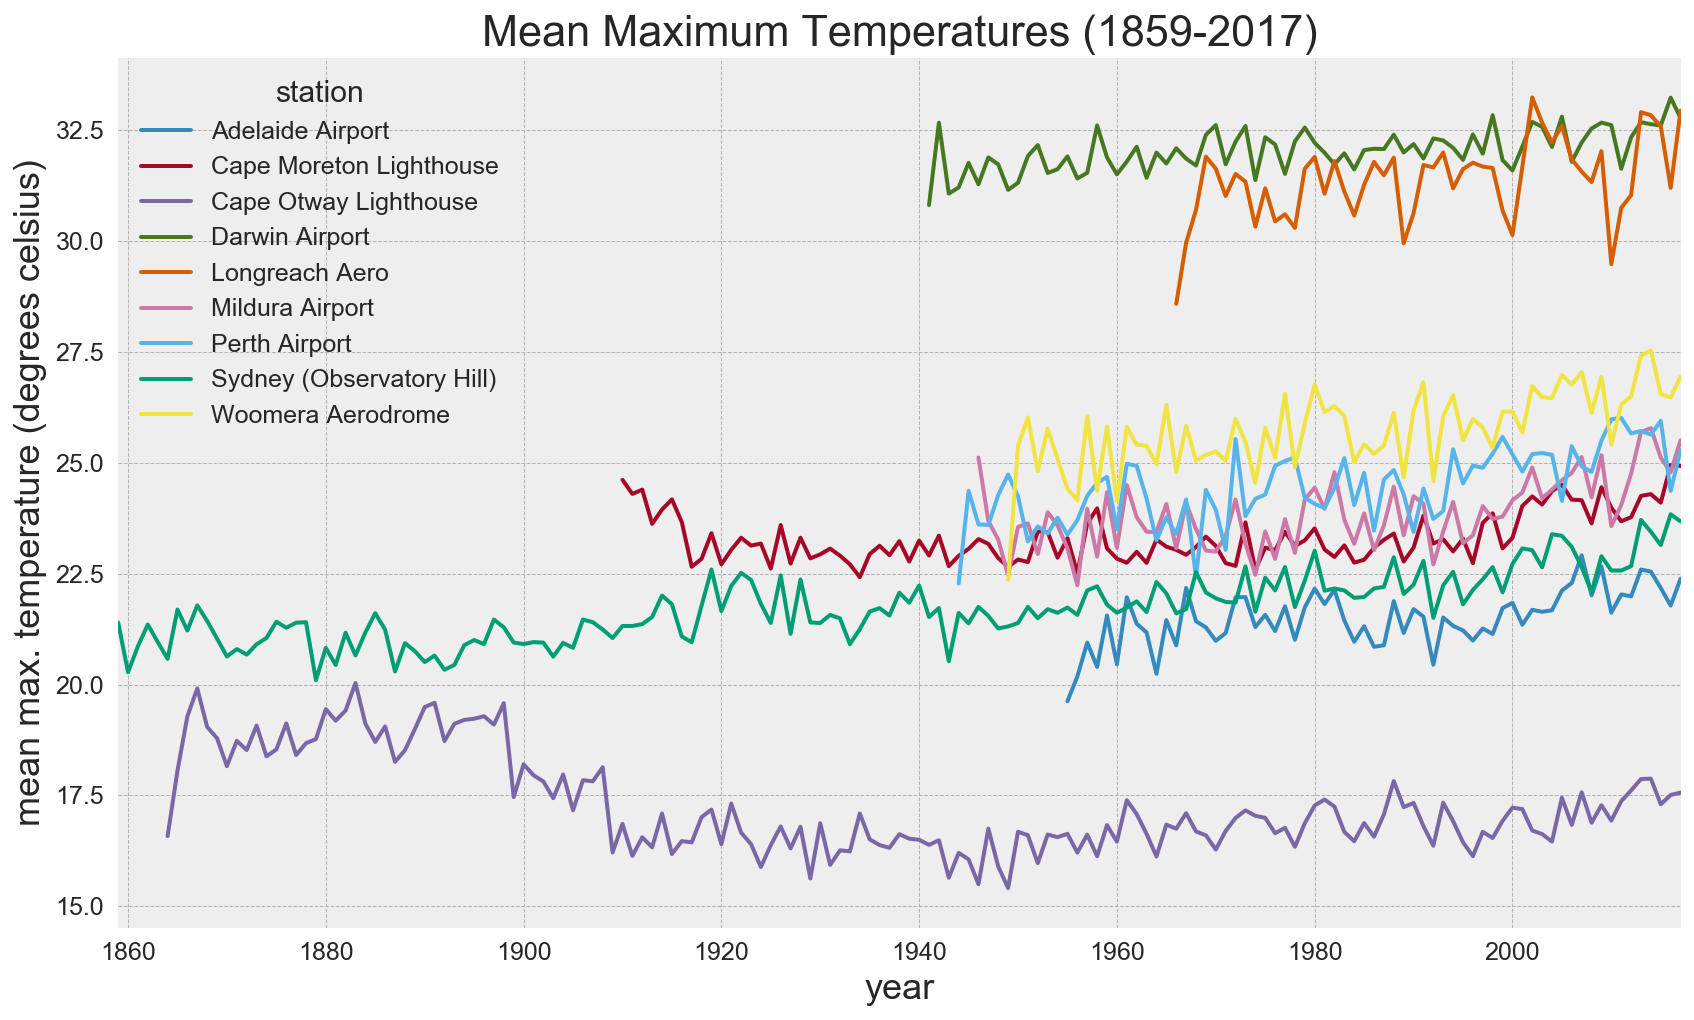

In [28]:
# Plot mean maximum temperatures over time.
temp_data_all.pivot_table('max_temp',
                          index='year', columns='station',
                          aggfunc='mean').plot(figsize=(14, 8)) 


plt.title('Mean Maximum Temperatures (1859-2017)')
plt.ylabel('mean max. temperature (degrees celsius)');

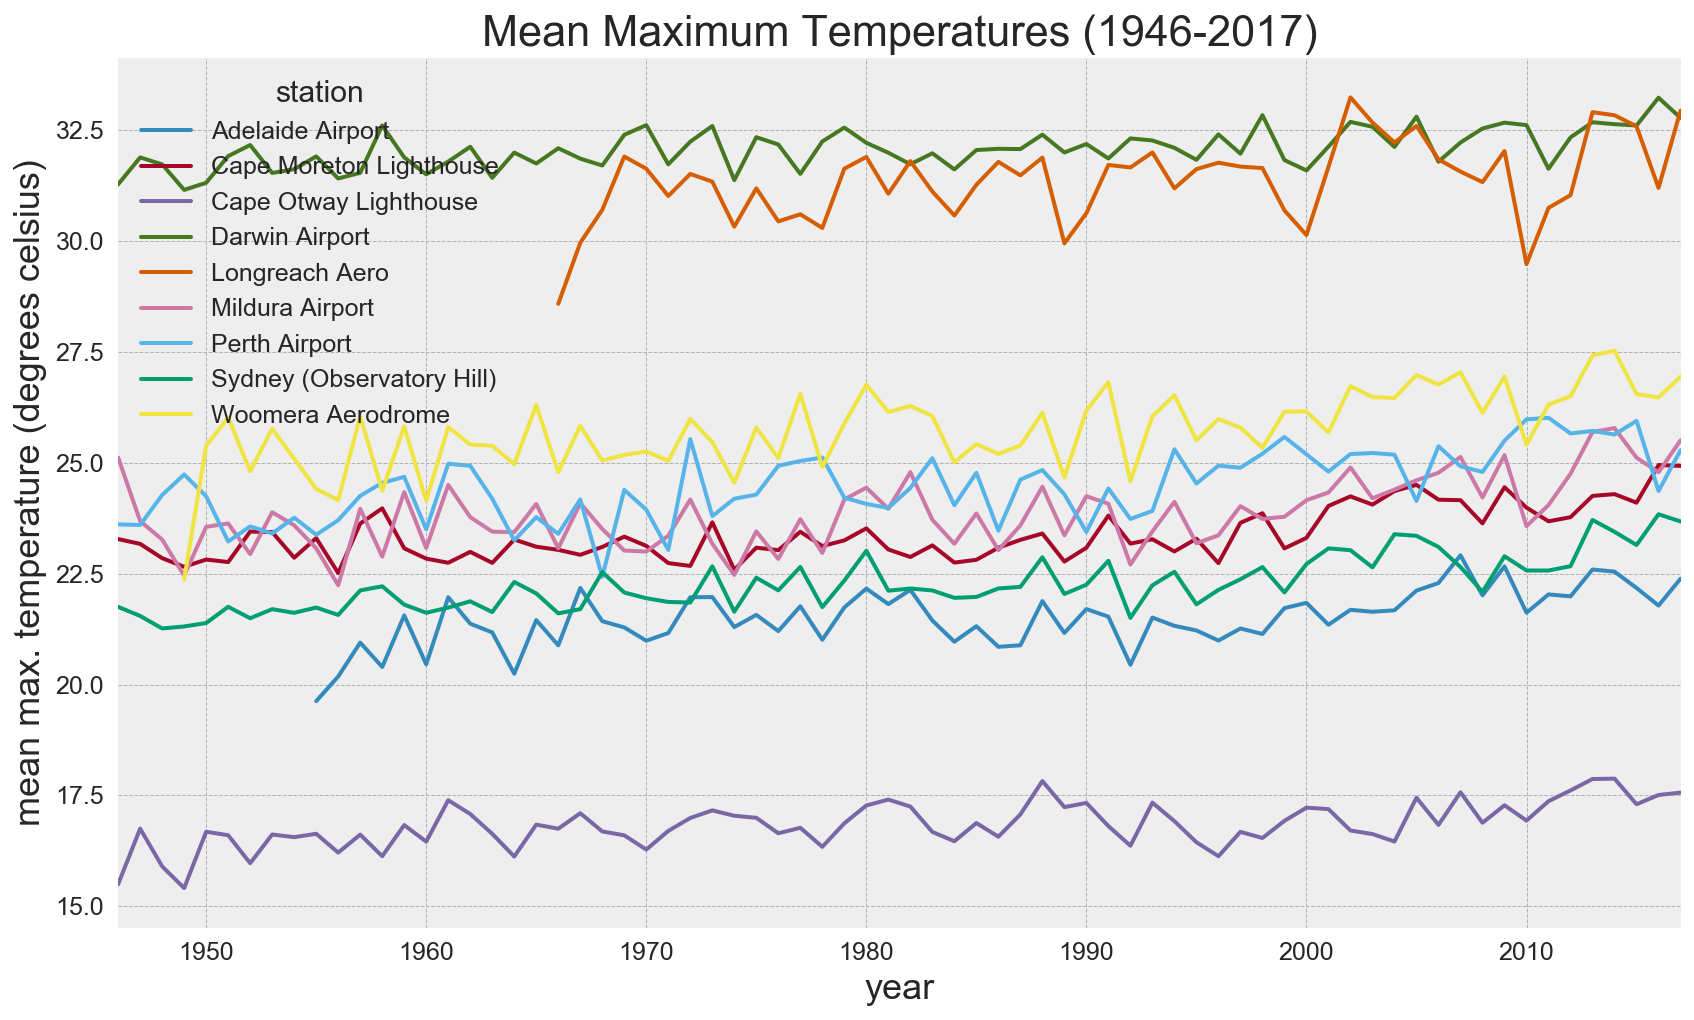

In [29]:
# Zoom into the above plot from 1946, from which point the trend seems consistent.
temp_data_all[temp_data_all['year'] > 1945].pivot_table('max_temp',
                          index='year', columns='station',
                          aggfunc='mean').plot(figsize=(14, 8)) 


plt.title('Mean Maximum Temperatures (1946-2017)')
plt.ylabel('mean max. temperature (degrees celsius)');

The below line plot similarly, highlights an upward trend in mean minimum temperatures. The trends at Darwin Airport and Mildura Airport seems to be relatively static compared to the others.

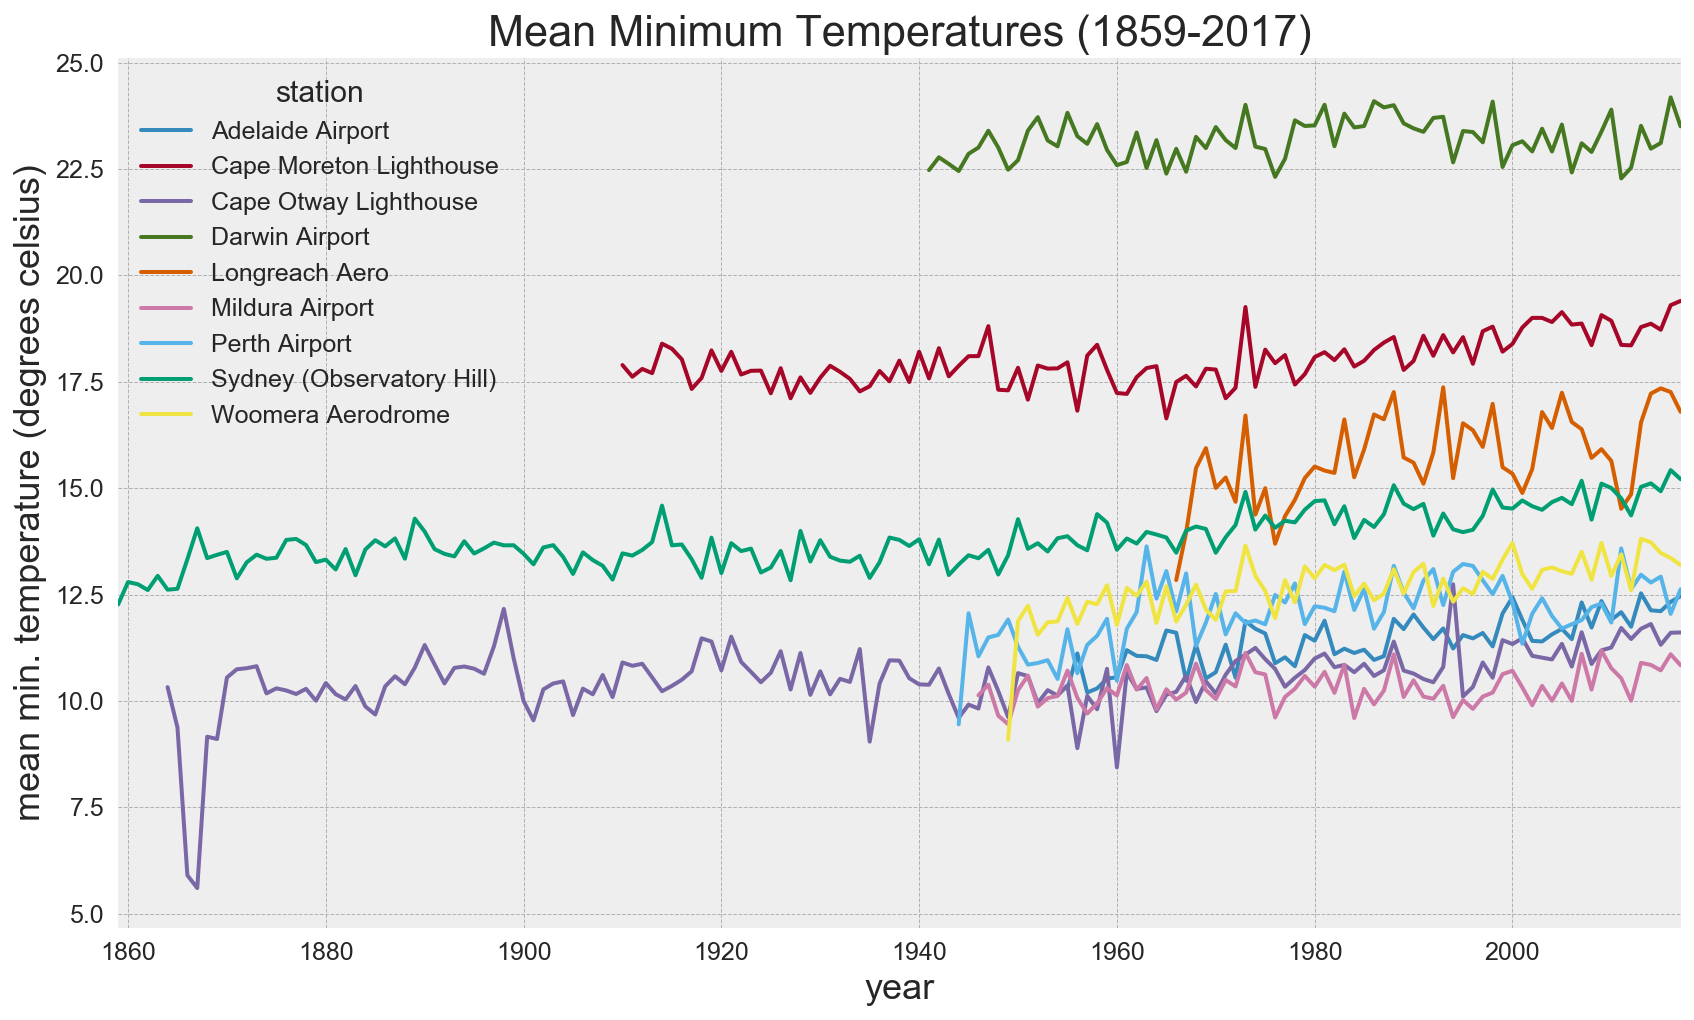

In [30]:
# Plot mean minimum temperatures over time.
temp_data_all.pivot_table('min_temp',
                          index='year', columns='station',
                          aggfunc='mean').plot(figsize=(14, 8)) 


plt.title('Mean Minimum Temperatures (1859-2017)')
plt.ylabel('mean min. temperature (degrees celsius)');

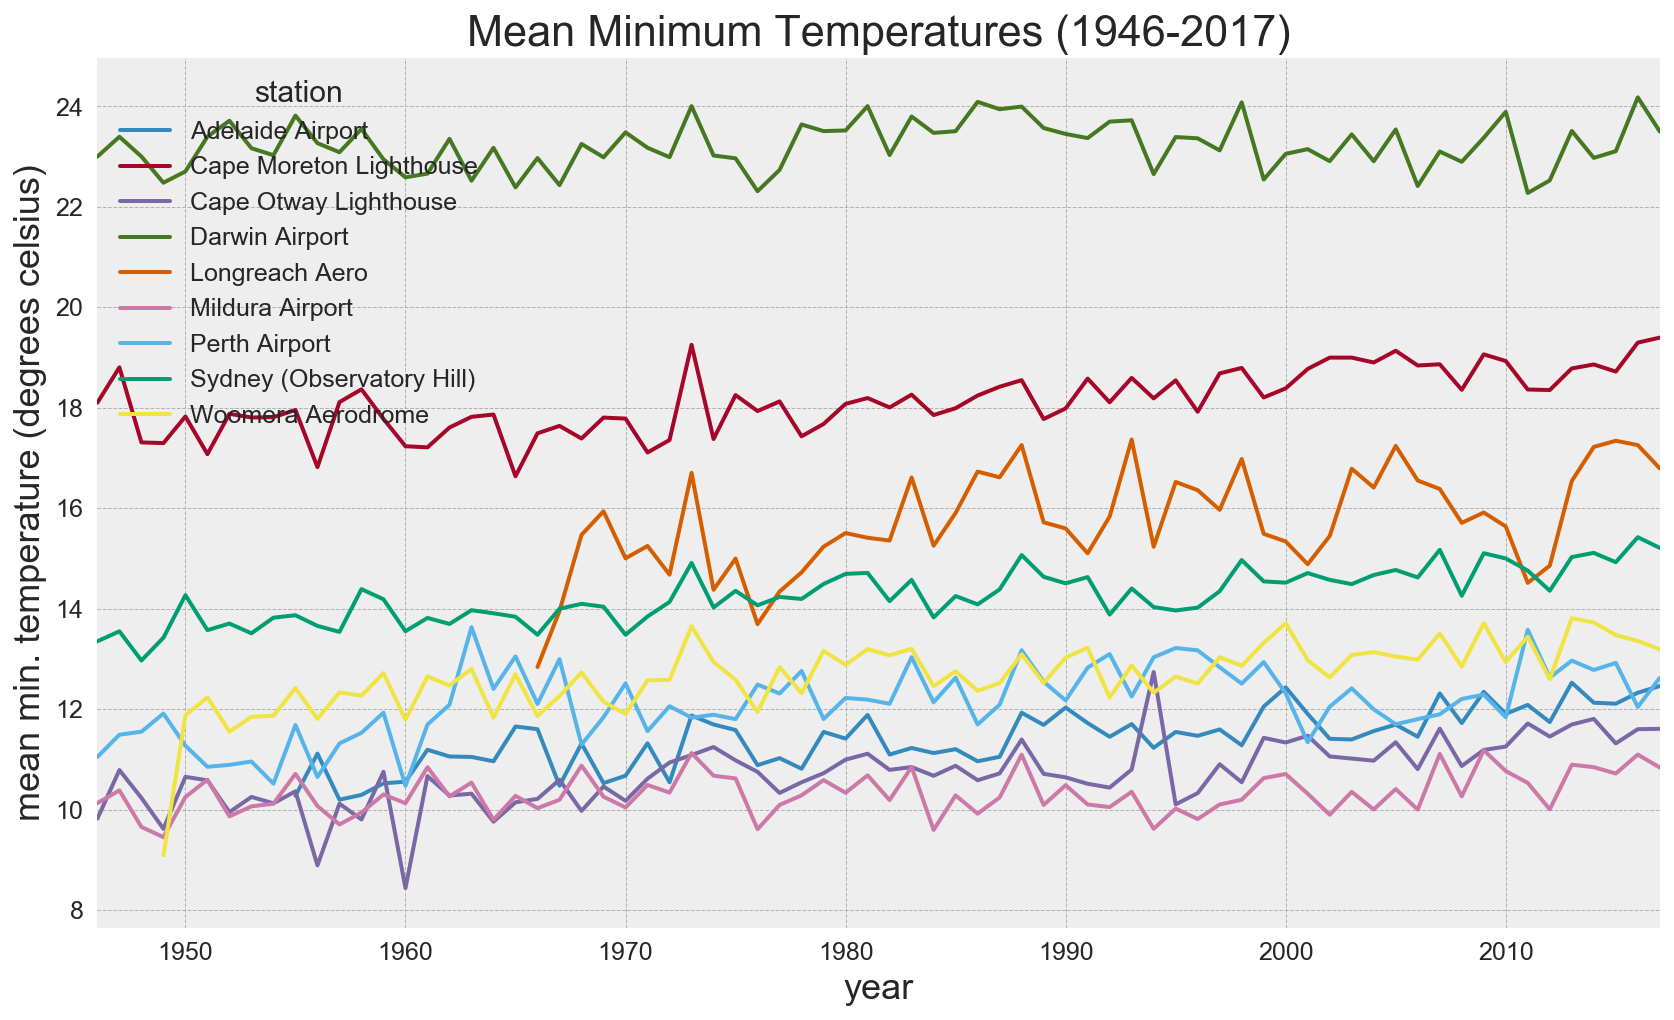

In [31]:
# Zoom into the above plot from 1946, from which point the trend seems consistent.
temp_data_all[temp_data_all['year'] > 1945].pivot_table('min_temp',
                          index='year', columns='station',
                          aggfunc='mean').plot(figsize=(14, 8)) 


plt.title('Mean Minimum Temperatures (1946-2017)')
plt.ylabel('mean min. temperature (degrees celsius)');

The pivot table below shows the trend indexed by decade as opposed to years. The mean increase in maximum temperatures between the 1960s and 2010s is the highest in the temperate stations of Perth Airport, followed by Woomera Aerodrome and Mildura Airport.

Note: the 2010s are not complete so this variance could increase by the end of December 2019.


In [32]:
# Pivot on mean maximum & minimum temperatures across weather stations by decades
temp_data_all.pivot_table(['max_temp', 'min_temp'], index='decade',
                      columns='station', aggfunc='mean').dropna()


max_temp                                                \
station Adelaide Airport Cape Moreton Lighthouse Cape Otway Lighthouse   
decade                                                                   
1960s          21.244402               23.010364             16.764082   
1970s          21.467716               23.073547             16.778510   
1980s          21.461894               23.067178             17.064353   
1990s          21.284662               23.298253             16.764007   
2000s          22.018889               24.092782             17.021355   
2010s          22.140623               24.247343             17.502405   

                                                                     \
station Darwin Airport Longreach Aero Mildura Airport Perth Airport   
decade                                                                
1960s        31.859584      30.457359       23.600219     23.901726   
1970s        32.141298      30.997238       23.333196     24.410825   
1980s        32.015987      31.282510       23.838986     24.363400   
1990s        32.163247      31.462072       23.669981     24.596550   
2000s        32.315467      31.932001       24.588366     25.032850   
2010s        32.566598      31.711434       24.908385     25.576626   

                                                            min_temp  \
station Sydney (Observatory Hill) Woomera Aerodrome Adelaide Airport   
decade                                                                 
1960s                   21.914834         25.291089        11.041128   
1970s                   22.123977         25.455930        11.198110   
1980s                   22.263482         25.707473        11.359852   
1990s                   22.236791         25.893591        11.609890   
2000s                   22.893892         26.538127        11.825623   
2010s                   23.204175         26.643151        12.162628   

                                                                      \
station Cape Moreton Lighthouse Cape Otway Lighthouse Darwin Airport   
decade                                                                 
1960s                 17.479949             10.110051      22.832565   
1970s                 17.842113             10.741237      23.184254   
1980s                 18.140847             10.871571      23.694863   
1990s                 18.366725             10.726756      23.341561   
2000s                 18.834042             11.169956      23.081096   
2010s                 18.840315             11.558267      23.247826   

                                                      \
station Longreach Aero Mildura Airport Perth Airport   
decade                                                 
1960s        14.794326       10.321955     12.156513   
1970s        14.898042       10.388438     12.103931   
1980s        16.044472       10.330000     12.384489   
1990s        16.047817       10.138757     12.807157   
2000s        16.068784       10.426088     12.002874   
2010s        16.266528       10.713963     12.674778   

                                                     
station Sydney (Observatory Hill) Woomera Aerodrome  
decade                                               
1960s                   13.841897         12.329047  
1970s                   14.175446         12.650357  
1980s                   14.440236         12.808719  
1990s                   14.331968         12.806590  
2000s                   14.690496         13.165314  
2010s                   14.978520         13.319129

Summarise the above table by printing out the mean and median differences in temperature between the 1960s and the 2010s. It is apparent that all stations maximum and minimum temperatures have increased over this time period.
The increase in mean maximum temperatures is higher than mean minimum temperatures. It is also noteworthy that the most tropical station (Darwin Airport) shows the smallest movement in both. Although Perth, Woomera and Mildura show the largest increase in mean maximum temperatures, they all show a relatively small increase in mean minimum temperatures. One possible explanation for this is that reduced cloud cover in these locations, is still allowing heat to escape quickly at night.

Note: as mentioned above, the 2010s are not complete so this variance could increase by the end of December 2019.

In [33]:
# Create a new dataframe for reviewing mean maximum temp differences from the 1960s to 2010s.
pivot_df = temp_data_all.pivot_table(['max_temp'], index='decade',
                      columns='station', aggfunc='mean').dropna()

# Use a loop to print column name and the difference between the last decade and the first decade mean maximum temperatures.
lst = []
ln =  len(pivot_df.index) - 1
i = 0
for column in pivot_df:
    print (pivot_df.columns[i], pivot_df.iloc[ln,i] - pivot_df.iloc[0,i])
    lst.append(pivot_df.iloc[ln,i] - pivot_df.iloc[0,i])
    i += 1
print ('Overall mean increase: ', mean(lst), 'degrees celsius.')
print ('Overall median increase: ', median(lst), 'degrees celsius.')

('max_temp', 'Adelaide Airport') 0.89622099957
('max_temp', 'Cape Moreton Lighthouse') 1.23697932396
('max_temp', 'Cape Otway Lighthouse') 0.738322700181
('max_temp', 'Darwin Airport') 0.707014309163
('max_temp', 'Longreach Aero') 1.25407471527
('max_temp', 'Mildura Airport') 1.30816566995
('max_temp', 'Perth Airport') 1.67490004426
('max_temp', 'Sydney (Observatory Hill)') 1.28934111222
('max_temp', 'Woomera Aerodrome') 1.35206157602
Overall mean increase:  1.16189782784 degrees celsius.
Overall median increase:  1.25407471527 degrees celsius.


In [34]:
# Re-use previous dataframe and variables for reviewing mean minimum temp differences from the 1960s to 2010s.
pivot_df = temp_data_all.pivot_table(['min_temp'], index='decade',
                      columns='station', aggfunc='mean').dropna()

# Use a loop to print column name and the difference between the last decade and the first decade mean maximum temperatures.
lst = []
ln =  len(pivot_df.index) - 1
i = 0
for column in pivot_df:
    print (pivot_df.columns[i], pivot_df.iloc[ln,i] - pivot_df.iloc[0,i])
    lst.append(pivot_df.iloc[ln,i] - pivot_df.iloc[0,i])
    i += 1
print ('Overall mean increase: ', mean(lst), 'degrees celsius.')
print ('Overall median increase: ', median(lst), 'degrees celsius.')

('min_temp', 'Adelaide Airport') 1.1215001878
('min_temp', 'Cape Moreton Lighthouse') 1.36036622562
('min_temp', 'Cape Otway Lighthouse') 1.44821604666
('min_temp', 'Darwin Airport') 0.415261485678
('min_temp', 'Longreach Aero') 1.47220283951
('min_temp', 'Mildura Airport') 0.392008481117
('min_temp', 'Perth Airport') 0.518264192422
('min_temp', 'Sydney (Observatory Hill)') 1.13662259115
('min_temp', 'Woomera Aerodrome') 0.990081755563
Overall mean increase:  0.983835978392 degrees celsius.
Overall median increase:  1.1215001878 degrees celsius.


The below boxplots highlight the distribution of maximum and minimum temperatures very clearly across the decades of BOM data. As expected, you can see an increase in size of the interquartile range for the temperate weather stations, while the tropical and sub-tropical range is fairly constant. The increase in each boxplot group is abundantly clear.

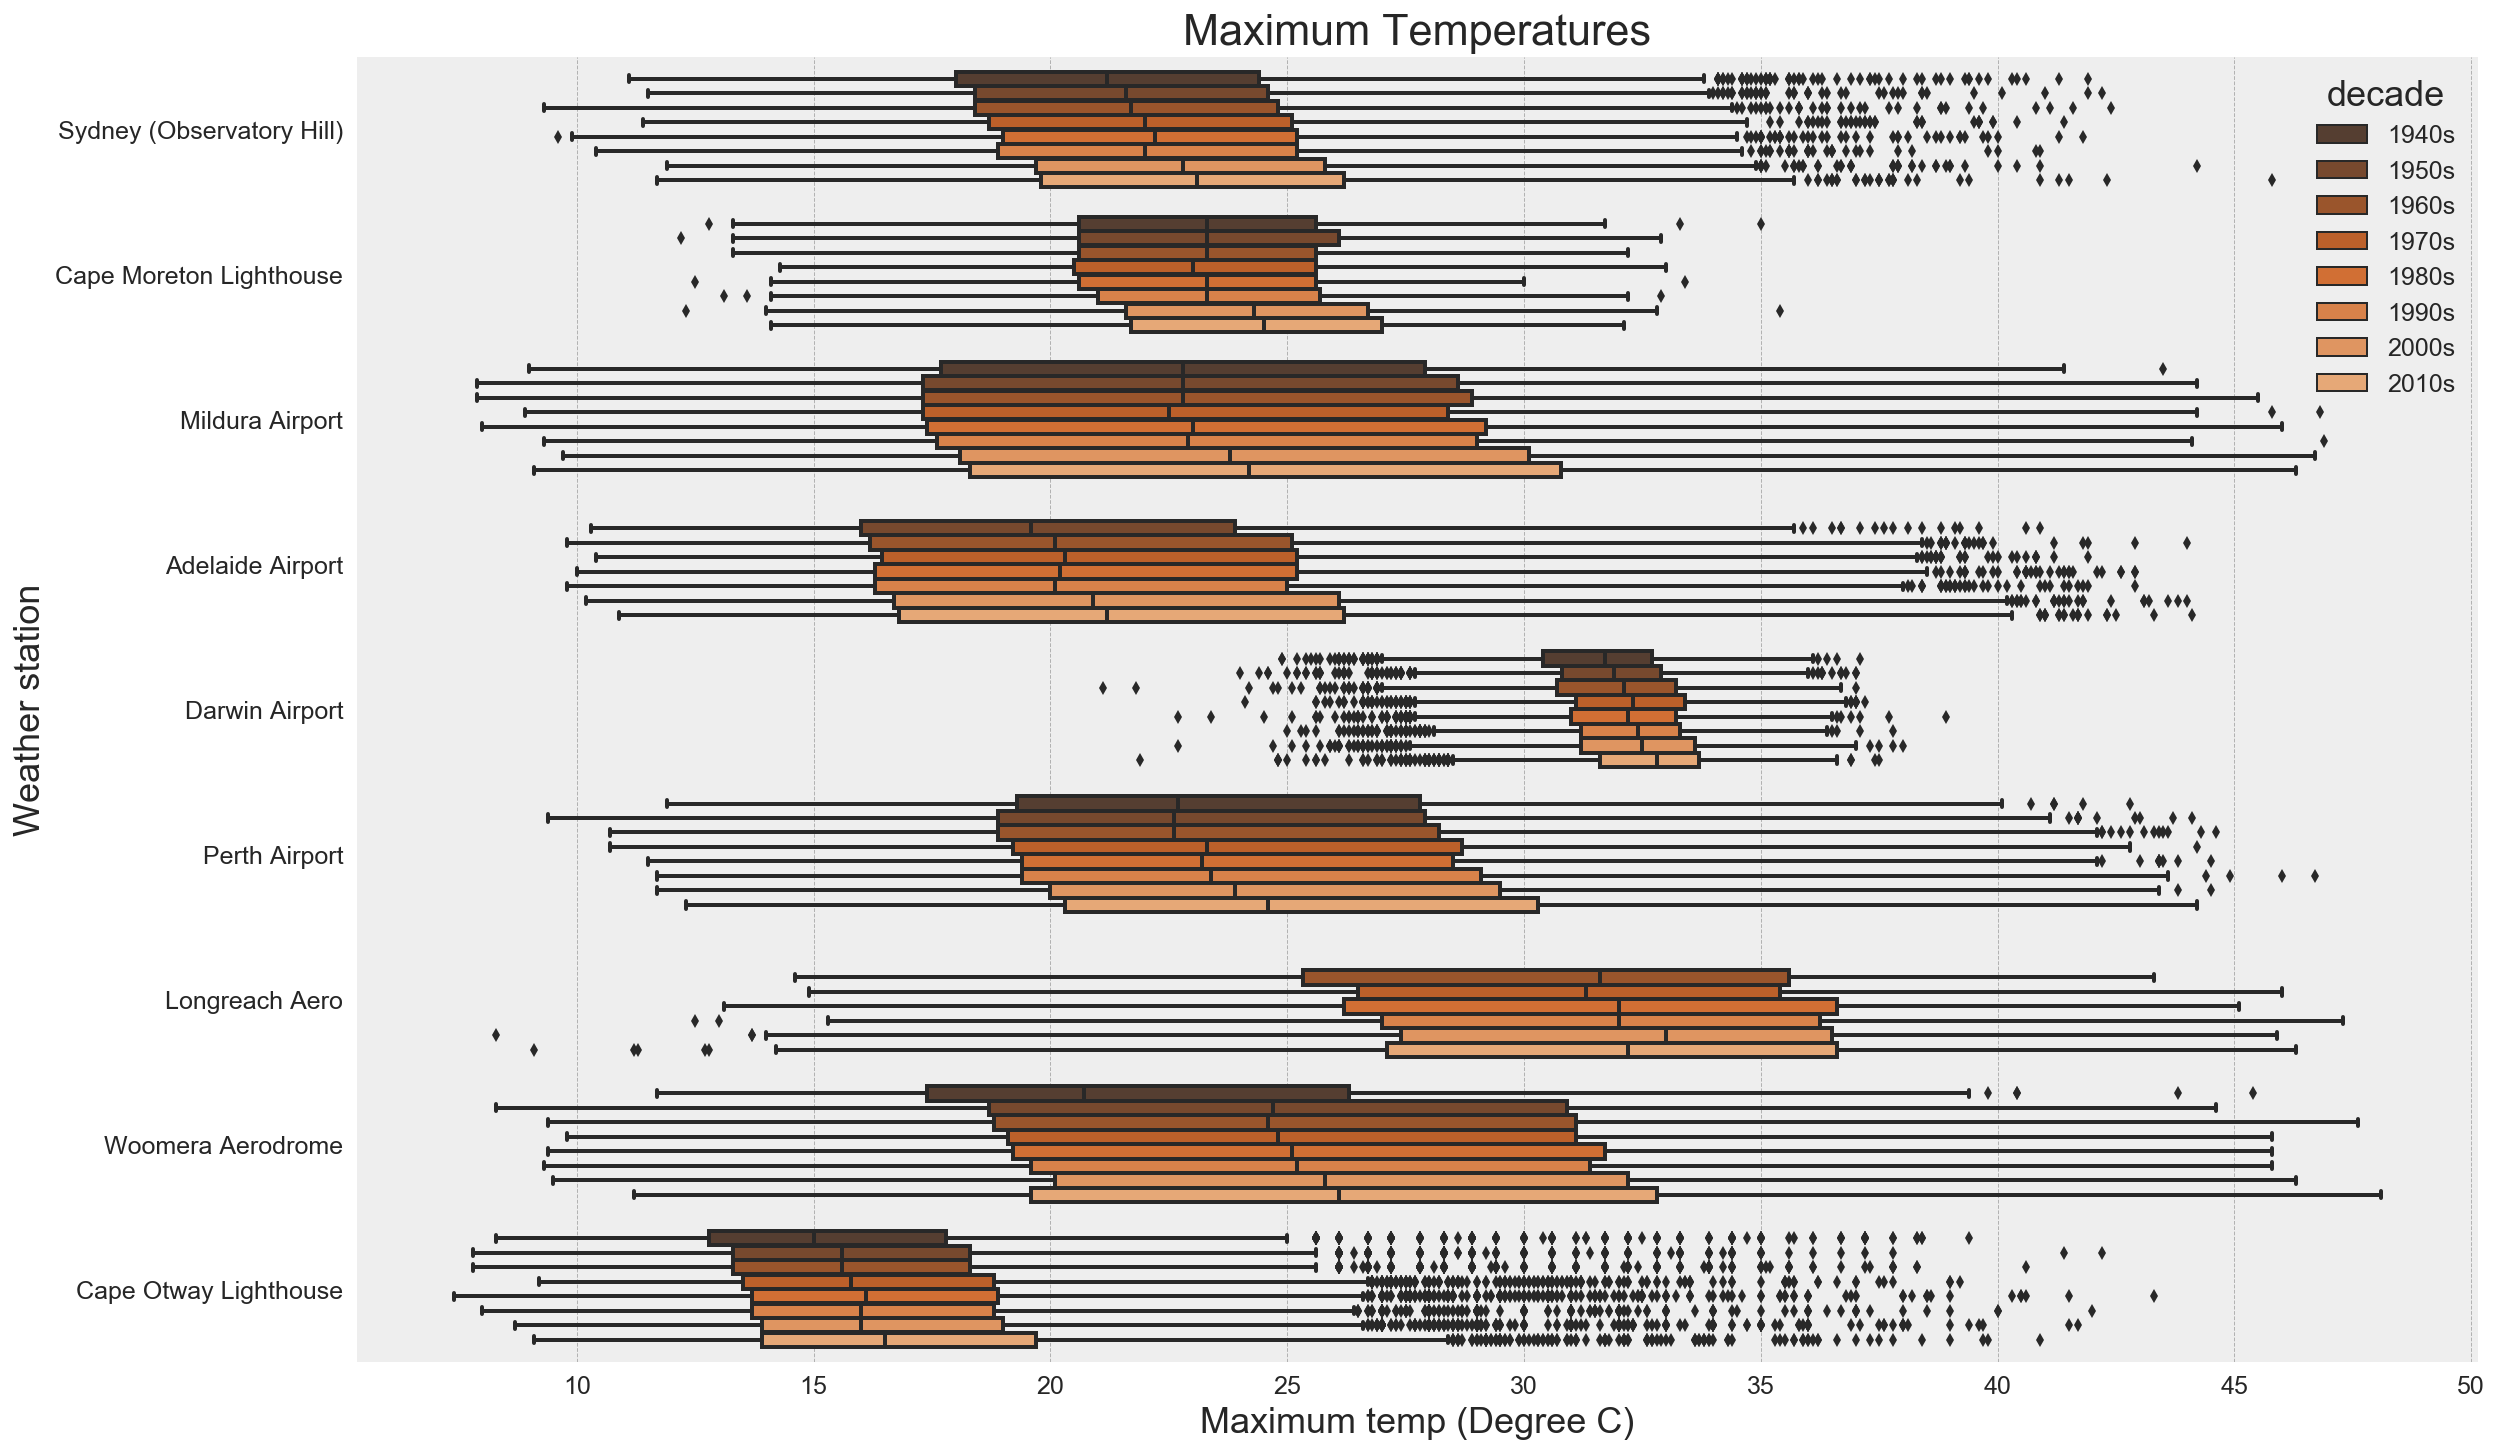

In [35]:
# Plot the above pivot table separately using boxplots
# Draw maximum temperature boxplots across decades for each station
plt.figure(figsize=(19, 12))

sns.boxplot(data=(temp_data_all[temp_data_all['year'] > 1939]).dropna(), x="max_temp",
            y="station", orient='h', hue="decade", palette="Oranges_d")
plt.title('Maximum Temperatures')
plt.ylabel('Weather station')
plt.xlabel("Maximum temp (Degree C)")
plt.savefig("max_temp_boxplot.png");

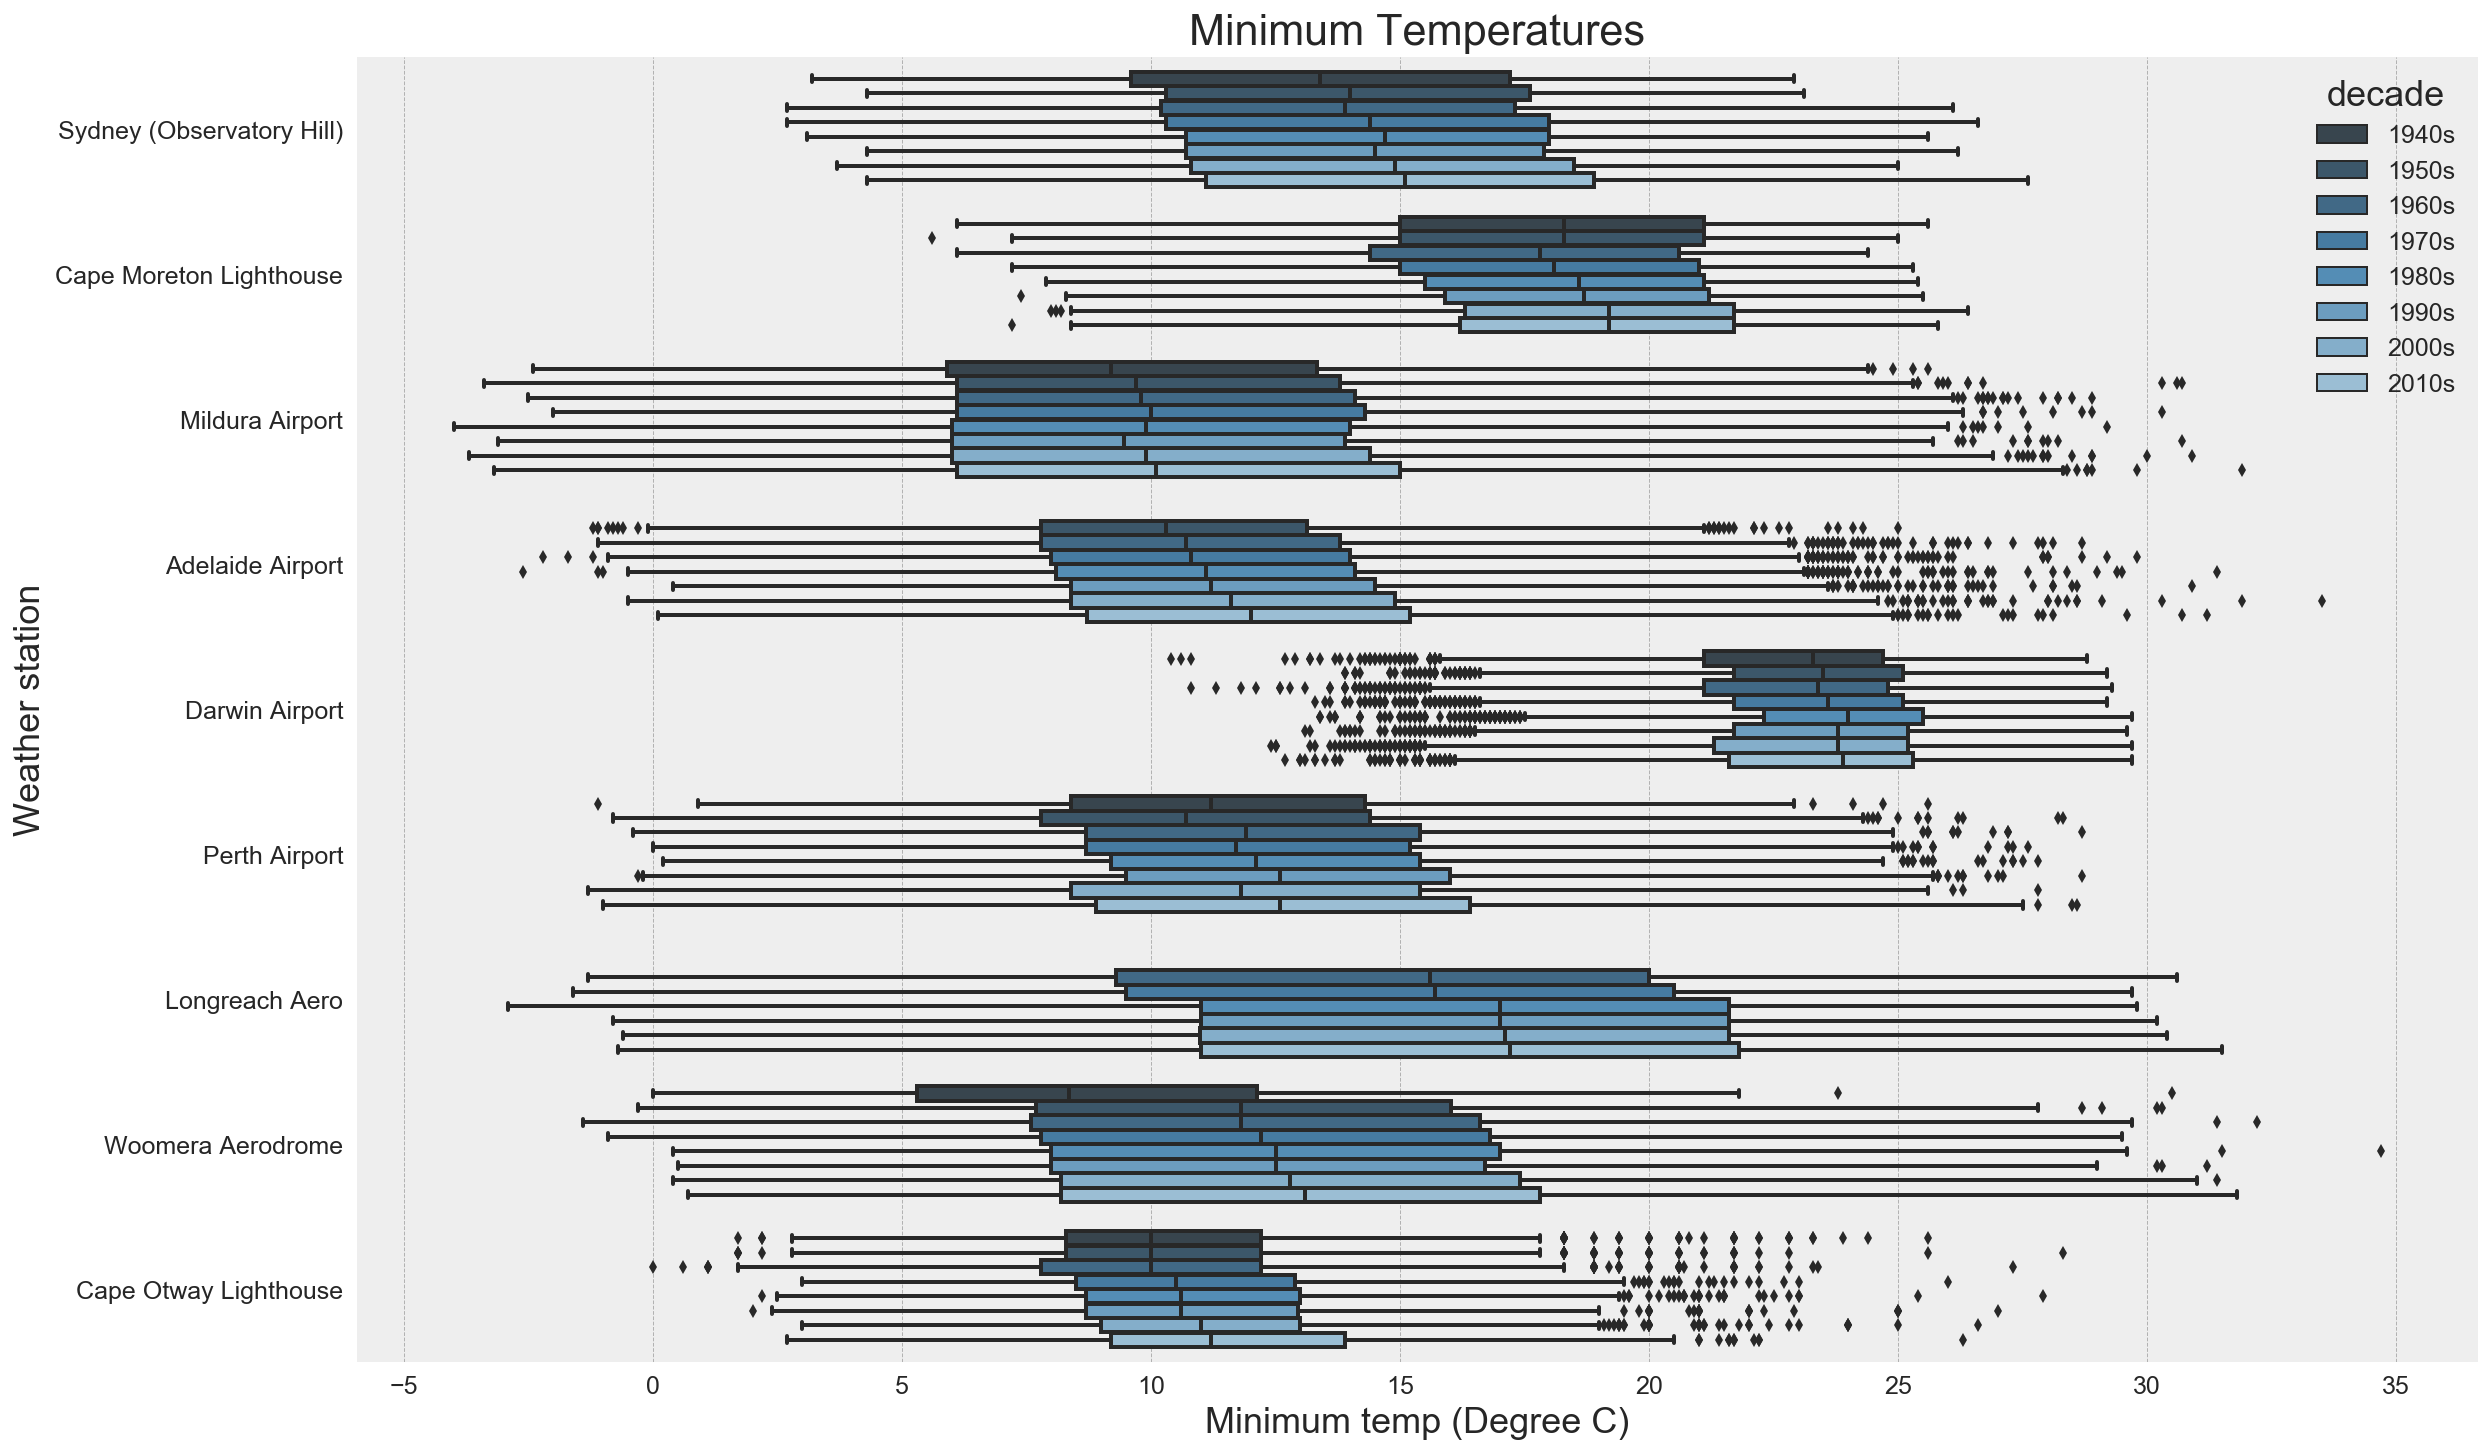

In [36]:
# Draw minimum temperature boxplots across decades for each station
plt.figure(figsize=(19, 12))

sns.boxplot(data=(temp_data_all[temp_data_all['year'] > 1939]).dropna(), x="min_temp",
            y="station", orient='h', hue="decade", palette="Blues_d")
plt.title('Minimum Temperatures')
plt.ylabel('Weather station')
plt.xlabel("Minimum temp (Degree C)")
plt.savefig("min_temp_boxplot.png");

The below pivot tables and plots provide some insights into the movement of more extreme temperatures. 

In [37]:
# Create pivot table for the number of 40 degrees celsius days or above, per decade
# Note 2010s not complete! Only those stations that register >= 40 will appear.

temp_data_all[temp_data_all['max_temp'] >= 40].pivot_table('max_temp', index='decade', columns='station',
                                                                                aggfunc='count', margins=True,
                                                                               margins_name='Total', fill_value='')
                                                                                

station Adelaide Airport Cape Otway Lighthouse Longreach Aero Mildura Airport  \
decade                                                                          
1860s                                        3                                  
1870s                                        5                                  
1880s                                        2                                  
1890s                                        5                                  
1900s                                        7                                  
1910s                                        1                                  
1920s                                                                           
1930s                                        1                                  
1940s                                                                       9   
1950s                  2                     2                             36   
1960s                  5                     1             62              51   
1970s                  9                                  199              38   
1980s                 24                     6            247              69   
1990s                 12                     3            220              52   
2000s                 31                     2            260             102   
2010s                 22                     1            225              85   
Total                105                    39           1213             442   

station Perth Airport Sydney (Observatory Hill) Woomera Aerodrome   Total  
decade                                                                     
1860s                                         1                       4.0  
1870s                                         1                       6.0  
1880s                                                                 2.0  
1890s                                         2                       7.0  
1900s                                         4                      11.0  
1910s                                         1                       2.0  
1920s                                         4                       4.0  
1930s                                         4                       5.0  
1940s               7                         5                 4    25.0  
1950s              31                         4                76   151.0  
1960s              46                         4                97   266.0  
1970s              37                         2               106   391.0  
1980s              42                         3               133   524.0  
1990s              46                         3               123   459.0  
2000s              40                         4               183   622.0  
2010s              46                         5               152   536.0  
Total             295                        47               874  3015.0

In the below plot the number of high maximum temperatures appear to be increasing at a faster rate for temperate inland stations (taking into account the low base formed by incomplete data in the initial decade for the datasets). It is important to keep in mind that the 2010s are incomplete and two more summers are yet to come (2018 & 2019).



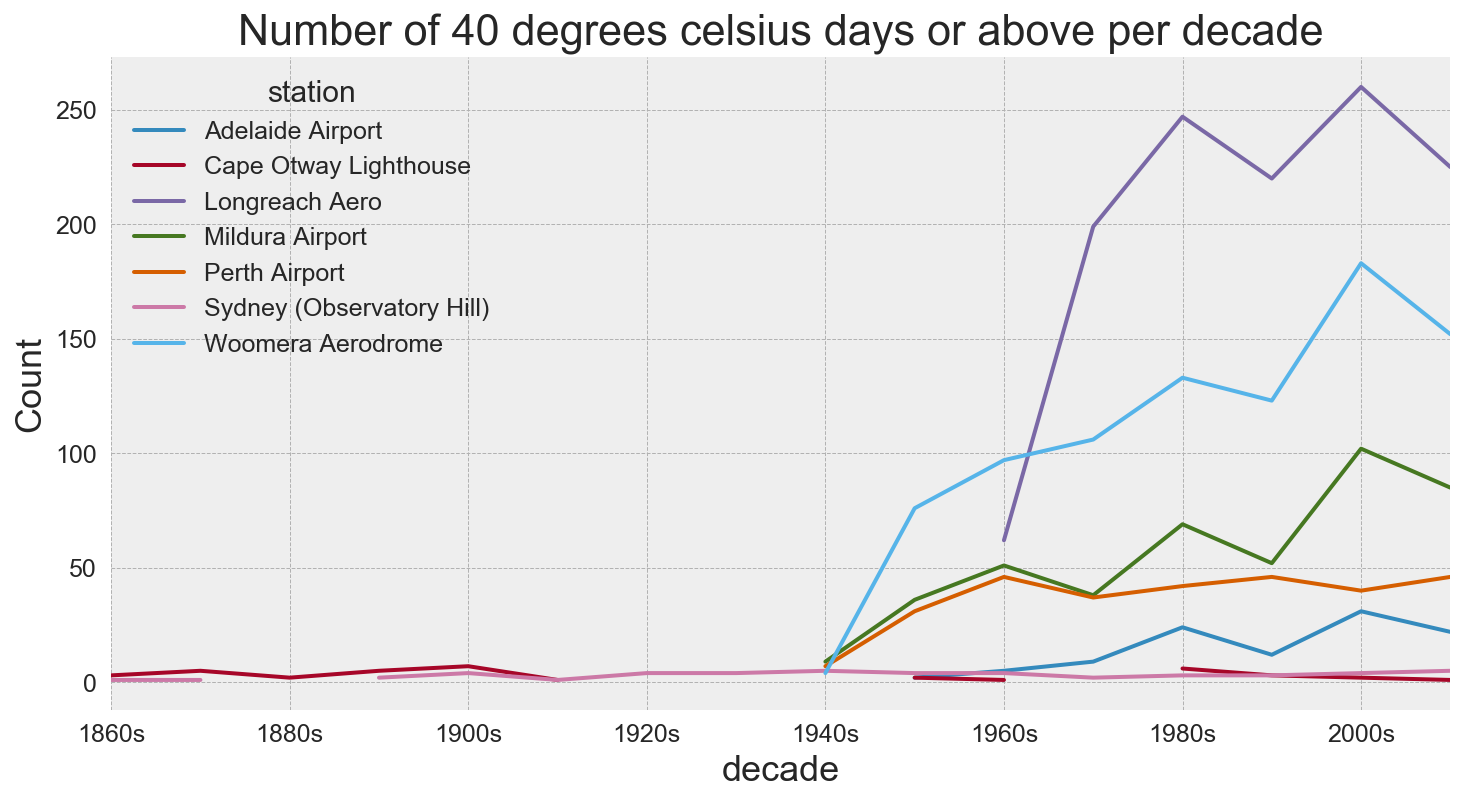

In [38]:
# Create pivot table for the number of mean maximum 40 degrees celsius days or above, per decade
# Note 2010s not complete! Only those stations that register >= 40 will appear. Datasets that start mid-way through the decade 
# will start from a low base.

temp_data_all[temp_data_all['max_temp'] >= 40].pivot_table('max_temp', index='decade', columns='station',
                                                                                aggfunc='count',
                                                                                fill_value=nan).plot(figsize=(12, 6))

plt.title('Number of 40 degrees celsius days or above per decade')
plt.ylabel('Count')
plt.savefig("40_and_above.png");

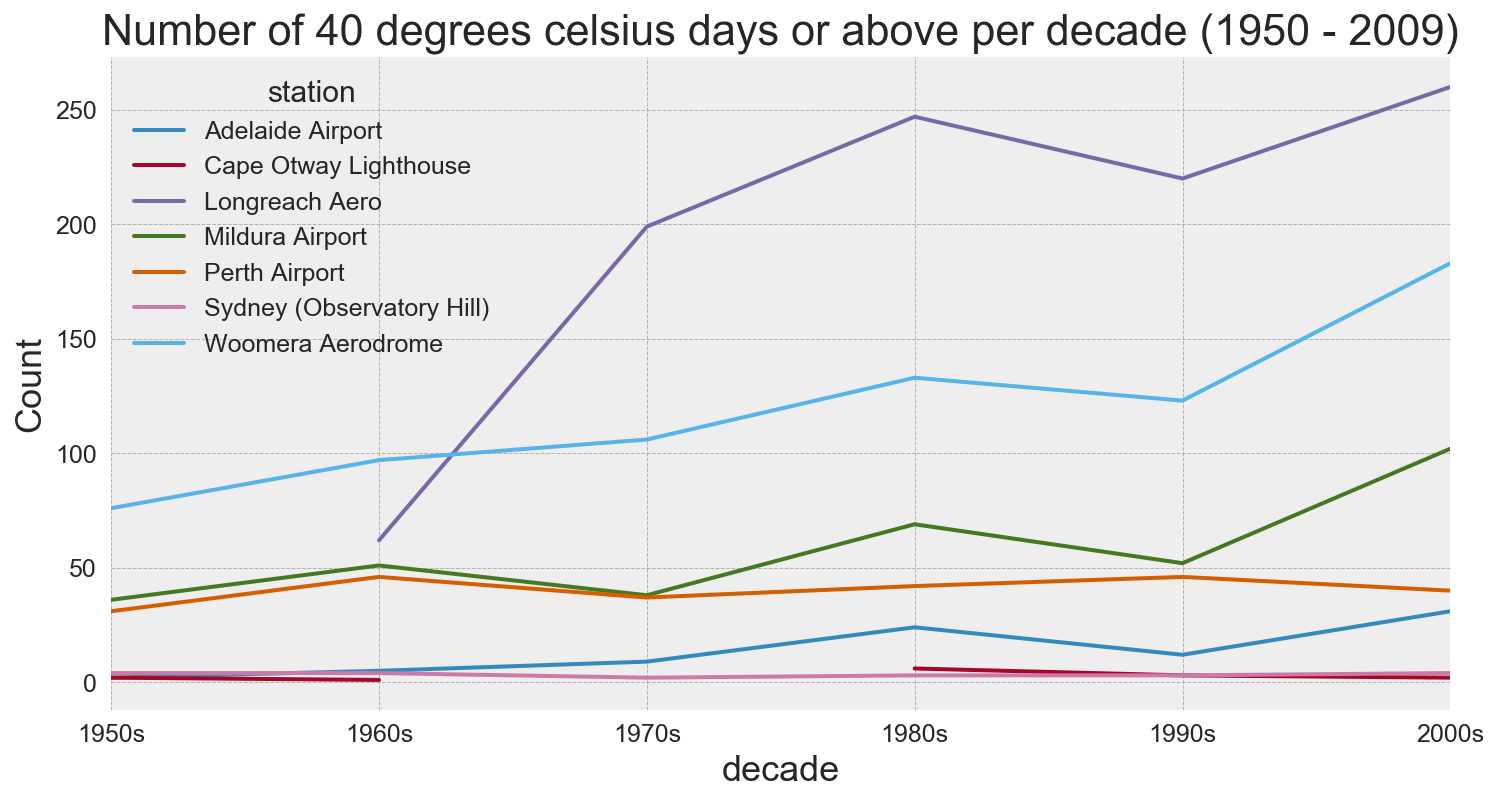

In [39]:
# Zoom into the above from the 1950s to the 2000s to reduce incomplete decades.
# Only those stations that register >= 40 will appear.

temp_data_all[(temp_data_all['max_temp'] >= 40) & (temp_data_all['year'] >= 1950) & (temp_data_all['year'] < 2010)].pivot_table('max_temp',
                                                                                index='decade', columns='station',
                                                                                aggfunc='count',
                                                                                fill_value=nan).plot(figsize=(12, 6))

plt.title('Number of 40 degrees celsius days or above per decade (1950 - 2009)')
plt.ylabel('Count');

In [40]:
# Create pivot table for the number of 5 degrees celsius days or below, per decade
# Note 2010s not complete! Only those stations that register <= 5 will appear.
# Datasets that start mid-way through the decade will start from a low base.

temp_data_all[temp_data_all['min_temp'] <= 5].pivot_table('min_temp', index='decade', columns='station',
                                                          aggfunc='count', margins=True, margins_name='Total', fill_value='')

station Adelaide Airport Cape Otway Lighthouse Longreach Aero Mildura Airport  \
decade                                                                          
1850s                                                                           
1860s                                      389                                  
1870s                                      131                                  
1880s                                      138                                  
1890s                                      108                                  
1900s                                      169                                  
1910s                                       81                                  
1920s                                       75                                  
1930s                                       77                                  
1940s                                      137                            247   
1950s                160                   130                            676   
1960s                323                   151             99             688   
1970s                313                    76            348             703   
1980s                258                    63            271             663   
1990s                263                    80            260             698   
2000s                267                    53            267             717   
2010s                195                    35            179             554   
Total               1779                  1893           1424            4946   

station Perth Airport  Sydney (Observatory Hill) Woomera Aerodrome    Total  
decade                                                                       
1850s                                       16.0                       16.0  
1860s                                       75.0                      464.0  
1870s                                       53.0                      184.0  
1880s                                       23.0                      161.0  
1890s                                       39.0                      147.0  
1900s                                       63.0                      232.0  
1910s                                       29.0                      110.0  
1920s                                       32.0                      107.0  
1930s                                       60.0                      137.0  
1940s             132                       48.0                63    627.0  
1950s             289                       20.0               380   1655.0  
1960s             206                       16.0               376   1859.0  
1970s             189                       19.0               295   1943.0  
1980s             160                       13.0               302   1730.0  
1990s             146                        5.0               286   1738.0  
2000s             291                        5.0               262   1862.0  
2010s             221                        3.0               265   1452.0  
Total            1634                      519.0              2229  14424.0

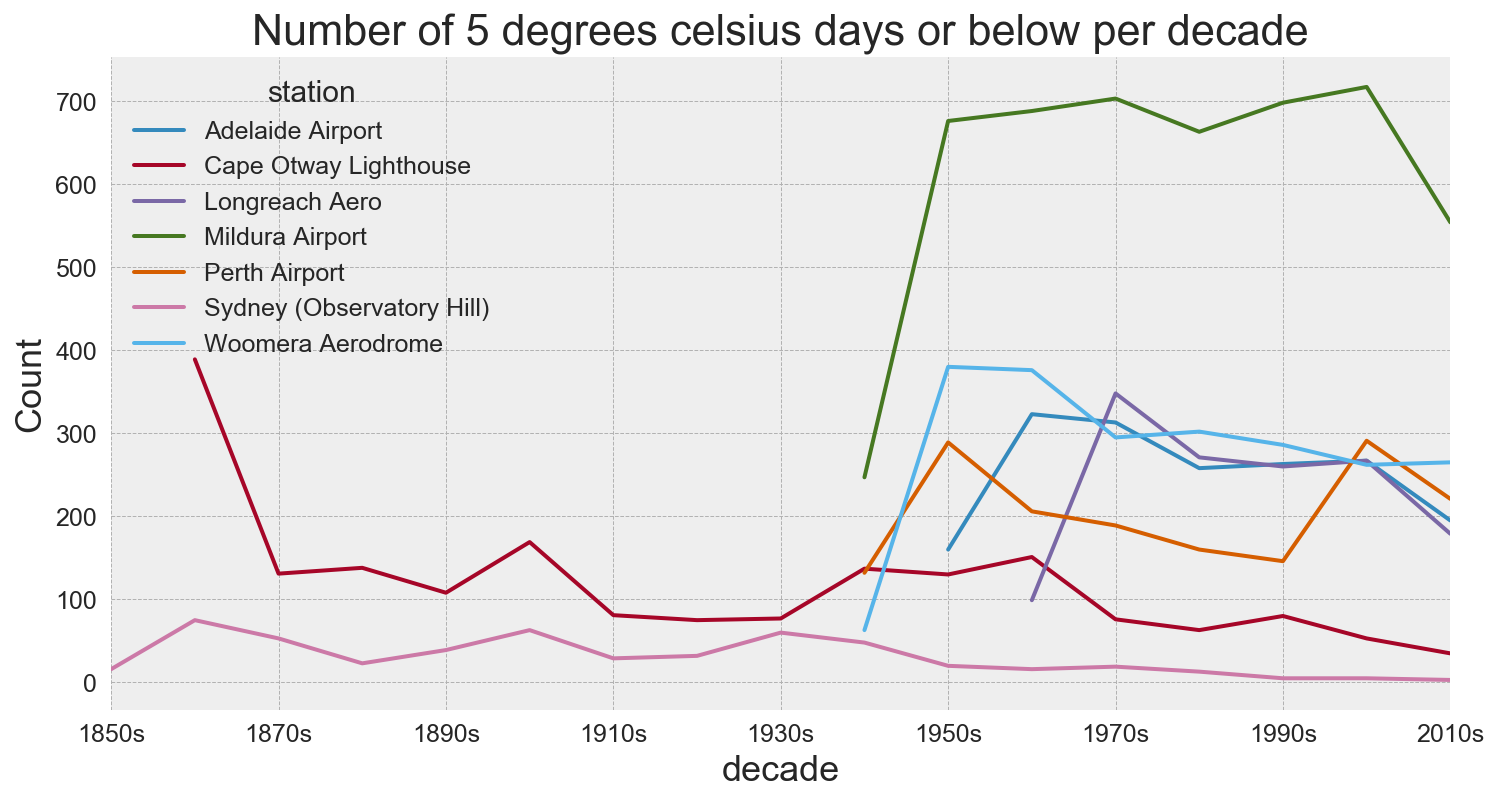

In [41]:
# Create pivot table for the number of mean minimum 5 degrees celsius days or below, per decade
# Note 2010s not complete! Datasets that start mid-way through the decade will start from a low base.
temp_data_all[temp_data_all['min_temp'] <= 5].pivot_table('min_temp', index='decade', columns='station',
                                                           aggfunc='count', fill_value=nan).plot(figsize=(12, 6))

plt.title('Number of 5 degrees celsius days or below per decade')
plt.ylabel('Count')
plt.savefig("5_and_below.png");

In [42]:
# Create pivot table for the maximum temperatures, per decade
# Note 2010s not complete!
temp_data_all.pivot_table(['max_temp', 'min_temp'],
                          index='decade', columns='station',
                          aggfunc='max', fill_value='')

max_temp                                                \
station Adelaide Airport Cape Moreton Lighthouse Cape Otway Lighthouse   
decade                                                                   
1850s                                                                    
1860s                                                             40.6   
1870s                                                             42.2   
1880s                                                             40.6   
1890s                                                             40.6   
1900s                                                             42.8   
1910s                                       32.8                  40.6   
1920s                                       32.2                  39.2   
1930s                                       32.9                    40   
1940s                                         35                  39.4   
1950s               40.9                    32.9                  42.2   
1960s                 44                    32.2                  40.6   
1970s               41.9                      33                  39.2   
1980s               42.9                    33.4                  43.3   
1990s               42.9                    32.9                    42   
2000s                 44                    35.4                  41.7   
2010s               44.1                    32.1                  40.9   

                                                                     \
station Darwin Airport Longreach Aero Mildura Airport Perth Airport   
decade                                                                
1850s                                                                 
1860s                                                                 
1870s                                                                 
1880s                                                                 
1890s                                                                 
1900s                                                                 
1910s                                                                 
1920s                                                                 
1930s                                                                 
1940s             37.1                           43.5          42.8   
1950s               37                           44.2          44.1   
1960s               37           43.3            45.5          44.6   
1970s             37.2             46            46.8          44.2   
1980s             38.9           45.1              46          44.5   
1990s             37.8           47.3            46.9          46.7   
2000s               38           45.9            46.7          44.5   
2010s             37.5           46.3            46.3          44.2   

                                                            min_temp  \
station Sydney (Observatory Hill) Woomera Aerodrome Adelaide Airport   
decade                                                                 
1850s                        36.9                                      
1860s                        41.6                                      
1870s                        40.7                                      
1880s                        39.3                                      
1890s                        42.5                                      
1900s                        41.9                                      
1910s                        40.3                                      
1920s                        42.1                                      
1930s                        45.3                                      
1940s                        41.9              45.4                    
1950s                        42.2              44.6               25   
1960s                        42.4              47.6             28.7   
1970s                        41.4 

In [43]:
# Create pivot table for the minimum temperatures, per decade
# Note 2010s not complete!
temp_data_all.pivot_table(['max_temp', 'min_temp'],
                          index='decade', columns='station',
                          aggfunc='min', fill_value='')

max_temp                                                \
station Adelaide Airport Cape Moreton Lighthouse Cape Otway Lighthouse   
decade                                                                   
1850s                                                                    
1860s                                                              8.9   
1870s                                                              8.3   
1880s                                                              7.2   
1890s                                                              9.4   
1900s                                                              7.8   
1910s                                       13.1                   8.9   
1920s                                       12.8                   7.2   
1930s                                       10.6                   6.7   
1940s                                       12.8                   8.3   
1950s               10.3                    12.2                   7.8   
1960s                9.8                    13.3                   7.8   
1970s               10.4                    14.3                   9.2   
1980s                 10                    12.5                   7.4   
1990s                9.8                    13.1                     8   
2000s               10.2                    12.3                   8.7   
2010s               10.9                    14.1                   9.1   

                                                                     \
station Darwin Airport Longreach Aero Mildura Airport Perth Airport   
decade                                                                
1850s                                                                 
1860s                                                                 
1870s                                                                 
1880s                                                                 
1890s                                                                 
1900s                                                                 
1910s                                                                 
1920s                                                                 
1930s                                                                 
1940s             24.9                              9          11.9   
1950s               24                            7.9           9.4   
1960s             21.1           14.6             7.9          10.7   
1970s             24.1           14.9             8.9          10.7   
1980s             22.7           13.1               8          11.5   
1990s             24.8           12.5             9.3          11.7   
2000s             22.7            8.3             9.7          11.7   
2010s             21.9            9.1             9.1          12.3   

                                                            min_temp  \
station Sydney (Observatory Hill) Woomera Aerodrome Adelaide Airport   
decade                                                                 
1850s                        11.1                                      
1860s                         7.7                                      
1870s                         9.1                                      
1880s                        10.2                                      
1890s                         9.6                                      
1900s                        10.0                                      
1910s                        11.0                                      
1920s                        10.8                                      
1930s                        10.6                                      
1940s                        11.1              11.7                    
1950s                        11.5               8.3             -1.2   
1960s                         9.3               9.4             -1.1   
1970s                        11.4 

Create a new variable to investigate the ranges between the minimum and maximum temperatures. There does not appear to be any noticeable increase or decrease in volatility.

In [44]:
# Create new column to hold temp range
print (temp_data_all.shape)
temp_data_all['range'] = temp_data_all['max_temp'] - temp_data_all['min_temp']
print (temp_data_all.shape)

(302409, 11)
(302409, 12)


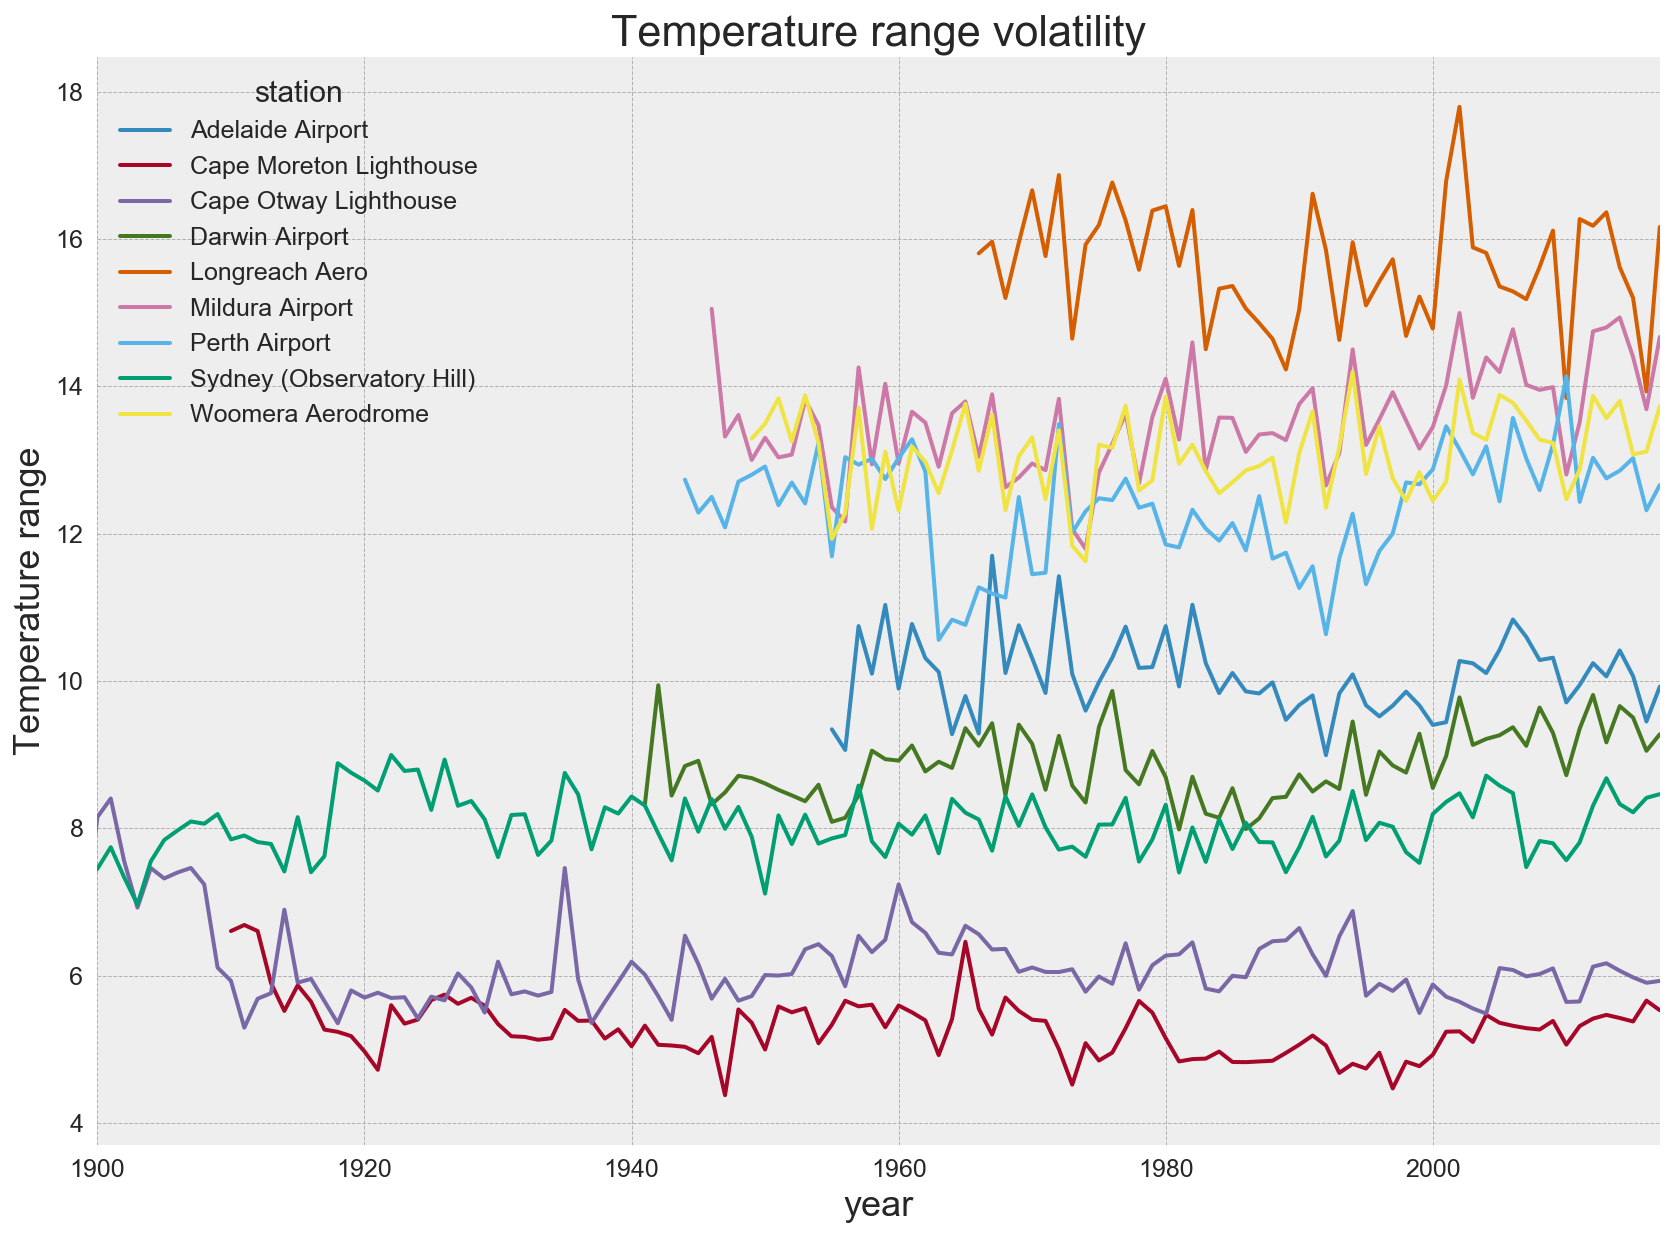

In [45]:
# Plot the trend in temperature ranges across time for weather stations.
# Exlude 2017 because it is incomplete  
temp_data_all.pivot_table('range', index='year', columns='station',
                          aggfunc='mean', fill_value=nan).plot(figsize=(14, 10))
plt.xlim(1900, 2017)
plt.title('Temperature range volatility')
plt.ylabel('Temperature range');

### 3. Further Visualisations

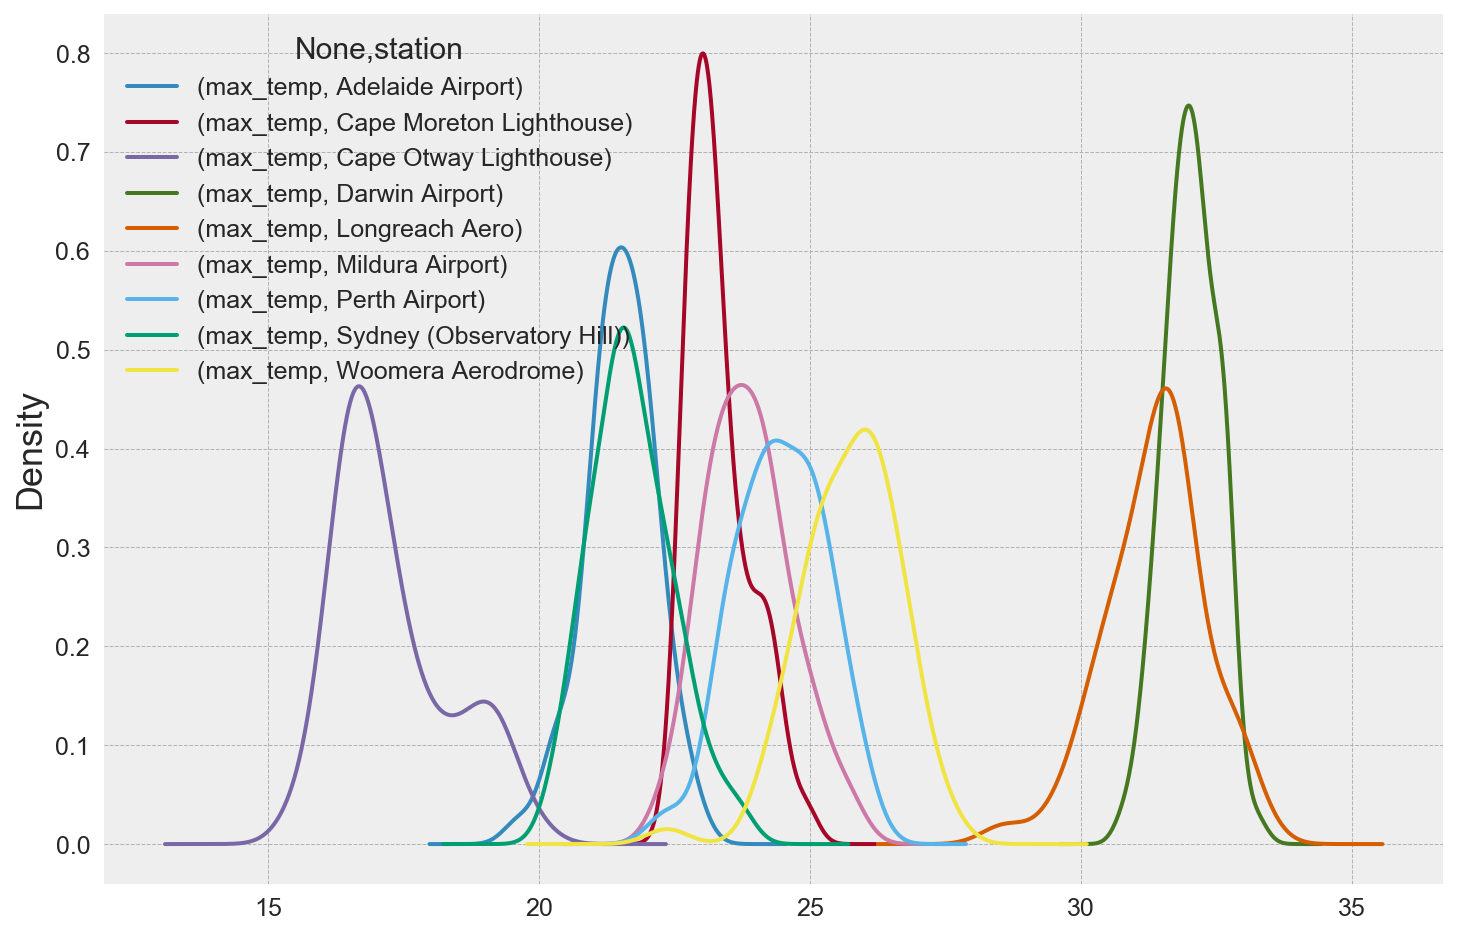

In [46]:
# Plot density plots

temp_data_all.pivot_table(['max_temp'], index='year', columns='station',
                          aggfunc='mean', fill_value=nan).plot(kind='density', figsize=(12, 8));
#max_data_all = temp_data_all.pivot("month", "year", "max_temp")

In the below kernel density estimation plots, we can see the broader distribution of temperatures at Adelaide Airport, compared to Darwin Airport and Cape Morten Lighthouse.

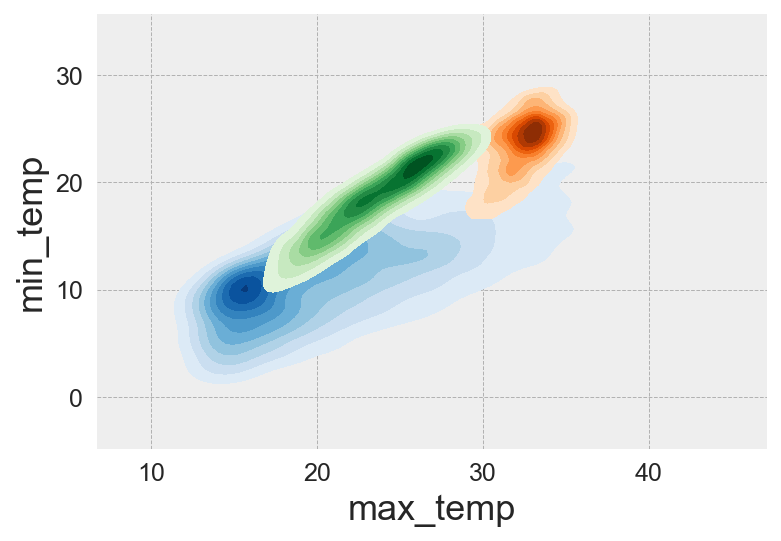

In [47]:
# Plot 3 bivariate densities with Seaborn
# see https://seaborn.pydata.org/generated/seaborn.kdeplot.html

# Gather data from 1980 only

yr = 1980
adl = temp_data_all[(temp_data_all['station'] == 'Adelaide Airport') & (temp_data_all['year'] > yr)].dropna()
dwn = temp_data_all[(temp_data_all['station'] == 'Darwin Airport') & (temp_data_all['year'] > yr)].dropna()
cml = temp_data_all[(temp_data_all['station'] == 'Cape Moreton Lighthouse') & (temp_data_all['year'] > yr)].dropna()



ax = sns.kdeplot(adl.max_temp, adl.min_temp,
                  cmap="Blues", shade=True, shade_lowest=False)
ax = sns.kdeplot(dwn.max_temp, dwn.min_temp,
                  cmap="Oranges", shade=True, shade_lowest=False)
ax = sns.kdeplot(cml.max_temp, cml.min_temp,
                  cmap="Greens", shade=True, shade_lowest=False)



The below seaborn pairplot shows variables max_temp, min_temp, year & month plotted against station. This plot can be useful for finding relationships that require further analysis.

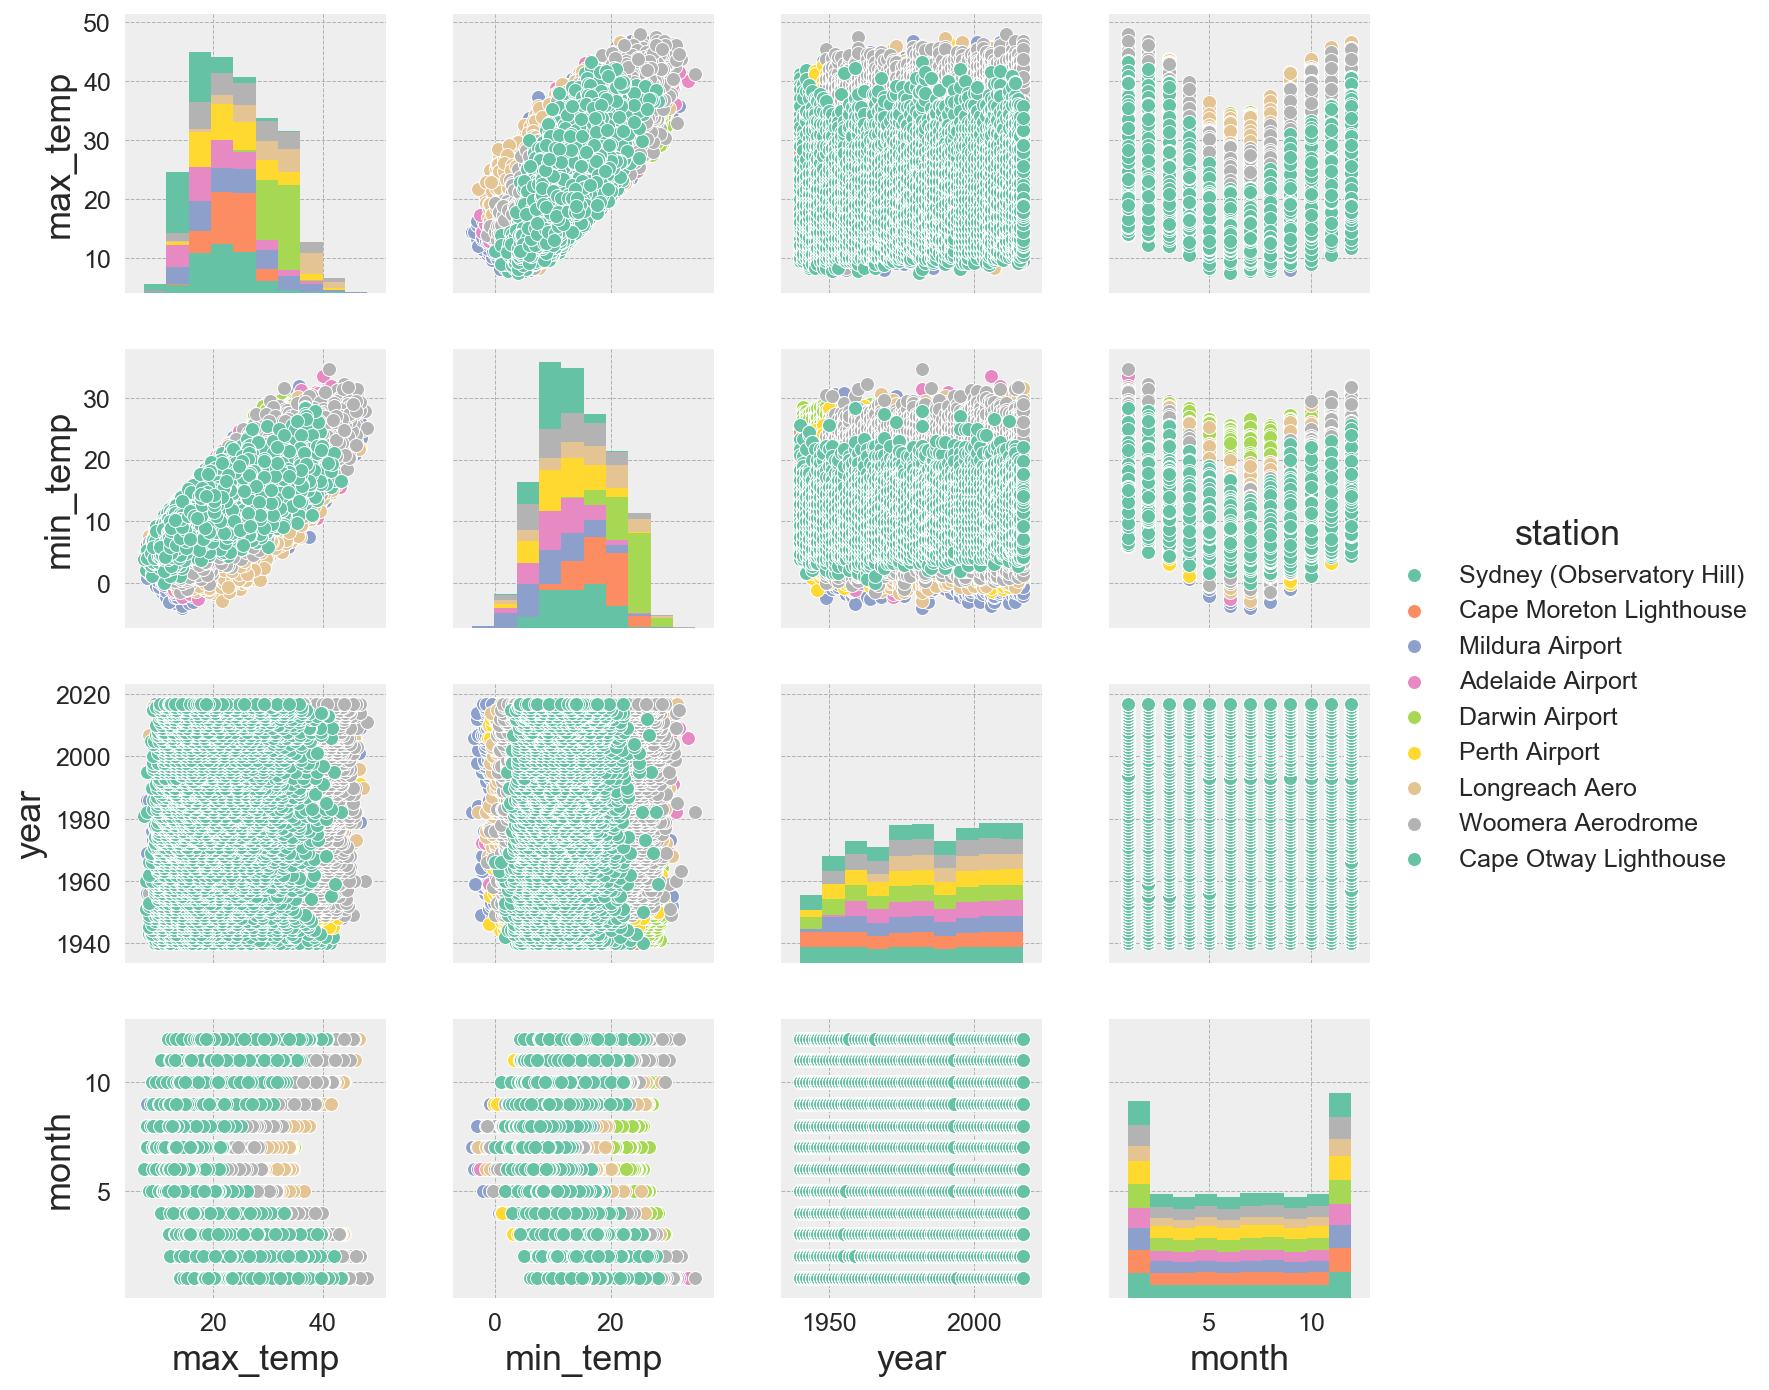

In [48]:
plt.figure(figsize=(19, 10))
sns.pairplot(data=(temp_data_all[temp_data_all['year'] > 1939]).dropna(),
             vars=['max_temp','min_temp', 'year', 'month'], hue='station', palette="Set2");

According to some articles, the R data science language appears to better suited to perform futher time series analysis. Produce a univariate extract to investigate later and perhaps create a prediction model in R...

In [49]:
# Create a new univariate time series dataset to explore further in R
# This requires a datetime index, assign to new dataframe beforehand.
temp_data = temp_data_all
temp_data['date'] = pd.to_datetime(temp_data_all[['day', 'month', 'year']])
temp_data.set_index('date', inplace=True)

# Get data for Station Mildura only, check the number of NaNs, remove NaNs
print (temp_data[temp_data.station == 'Mildura Airport'].isnull().sum())
# Number of NaNs is not excessive, just drop them.
mildura = temp_data[temp_data.station == 'Mildura Airport'].dropna()
print (mildura.shape)
print (mildura.head(5))
print (type(mildura))

# Convert daily to the monthly mean, with a time stamp of the first day of the month
mildura = mildura['max_temp'].resample('MS').mean()

# Review
print (mildura.shape)
print (mildura.head(5))
print (mildura.tail(5))
print (type(mildura))

# Export to csv for use in RStudio in a format that can easily be converted to an xts object.
mildura.to_csv("mildura_temps.csv", header=True)

station_number      0
year                0
month               0
day                 0
max_temp          251
min_temp          263
station             0
lat                 0
lon                 0
elevation           0
decade              0
range             268
dtype: int64
(26030, 12)
            station_number  year  month  day  max_temp  min_temp  \
date                                                               
1946-08-26           76031  1946      8   26      19.8       0.0   
1946-08-27           76031  1946      8   27      14.8       8.3   
1946-08-28           76031  1946      8   28      14.5       4.3   
1946-08-29           76031  1946      8   29      16.3       4.3   
1946-08-30           76031  1946      8   30      18.3       3.3   

                    station    lat     lon  elevation decade  range  
date                                                                 
1946-08-26  Mildura Airport -34.24  142.09         50  1940s   19.8  
1946-08-27  Mildura Airp